# Time Series

In [140]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# matplotlib configuration
import matplotlib as mpl
mpl.rcParams["axes.labelsize"] = 18
mpl.rcParams["axes.titlesize"] = 20
mpl.rcParams["xtick.labelsize"] = 12
mpl.rcParams["ytick.labelsize"] = 12
mpl.rcParams["legend.fontsize"] = 12
mpl.rcParams["figure.figsize"] = (12, 4)
# retina display only (e.g. MacOS)
%config InlineBackend.figure_format = 'retina'

What's different between the EEG waveform and normally distributed random values below?

In [141]:
EEG = np.load('EEG.npy')

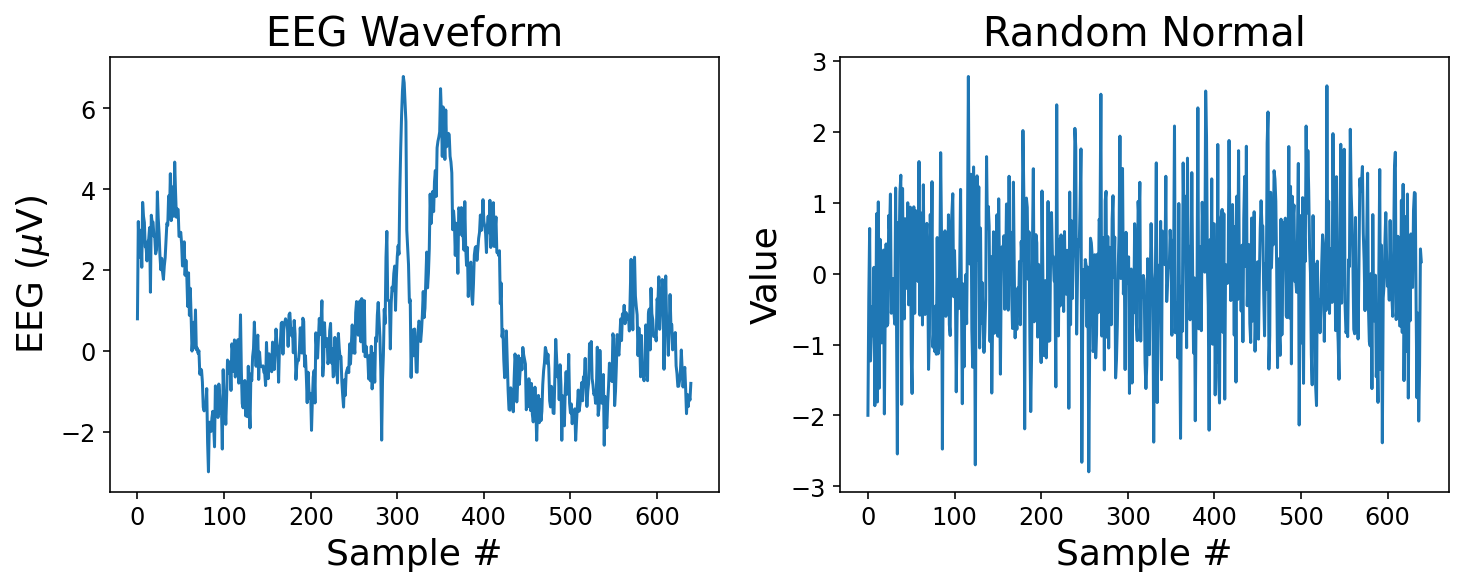

In [142]:
# time series vs. random independent values
plt.subplot(1, 2, 1)
plt.plot(EEG)
plt.xlabel('Sample #')
plt.ylabel('EEG ($\mu$V)')
plt.title('EEG Waveform')

plt.subplot(1, 2, 2)
plt.plot(np.random.randn(len(EEG)))
plt.xlabel('Sample #')
plt.ylabel('Value')
plt.title('Random Normal');

## Autocorrelation

Correlation of a waveform with itself, but shifted in time.

First consider a simple sinusoidal waveform with some added noise for fun.

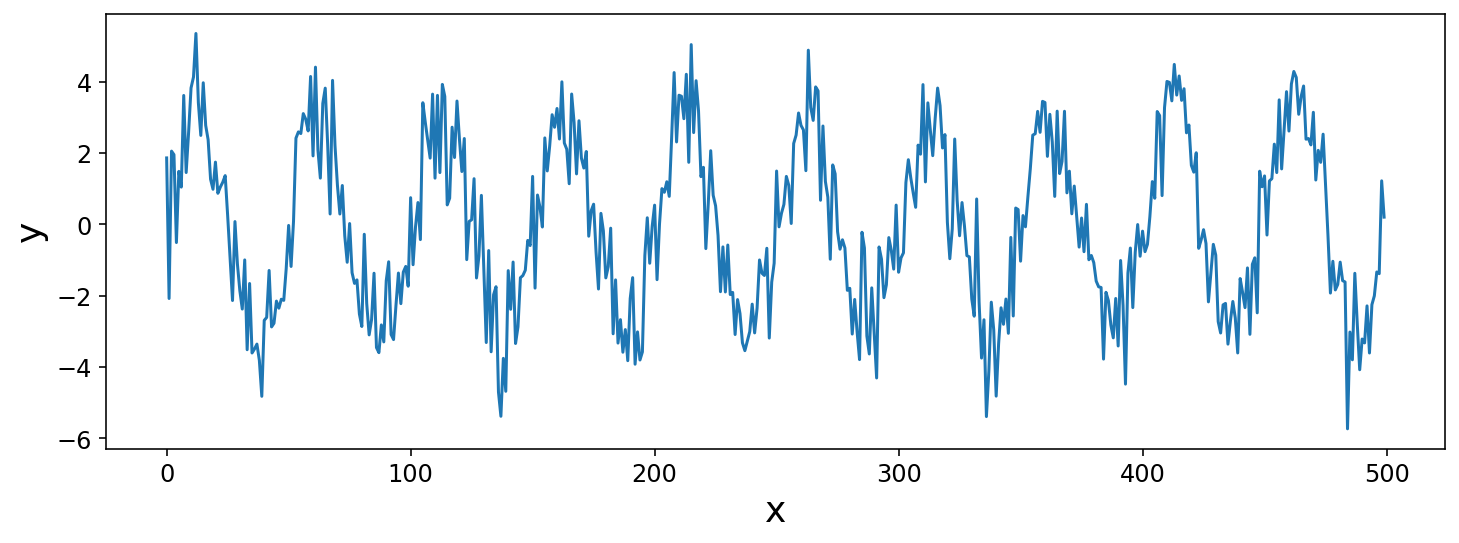

In [57]:
x = np.arange(500)
y = 3 * np.sin(2 * np.pi * 1/50 * x) + np.random.randn(500)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('y');

Now imagine taking an exact copy of the waveform and sliding it along the x axis with respect to the original waveform, each step of the way computing how similar the shifted waveform is to the original.

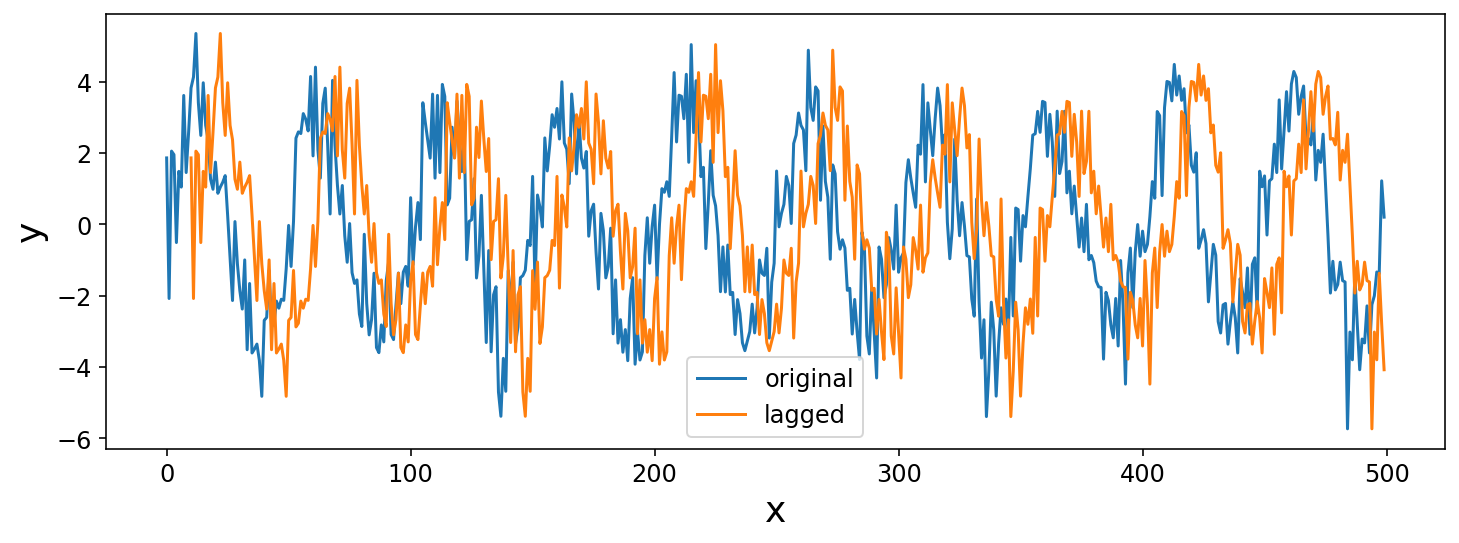

In [58]:
plt.plot(x, y, label='original')
plt.plot(x[10:], y[:-10], label='lagged')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

### [statsmodels](https://www.statsmodels.org/stable/index.html)

In [143]:
from statsmodels.tsa.stattools import acf

In [144]:
# correlation of waveform with itself for lags from 0-499 time points
autocorrelation = acf(y, nlags=500, fft=True)

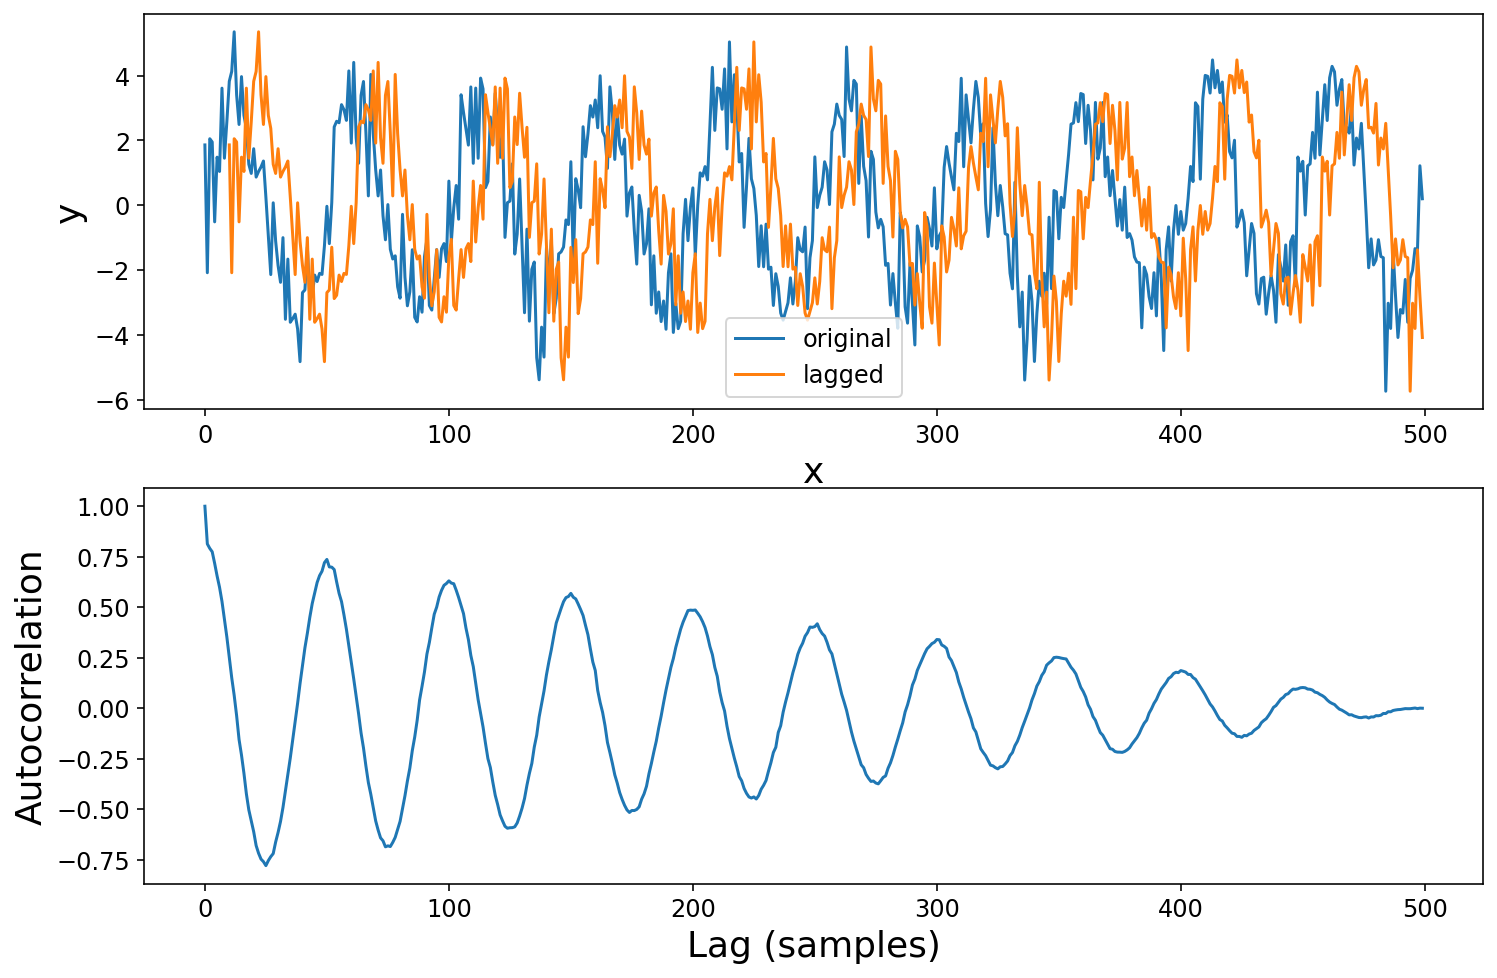

In [61]:
# lag and autocorrelation
plt.figure(figsize=(12,8))
plt.subplot(2,1,1)
plt.plot(x, y, label='original')
plt.plot(x[10:], y[:-10], label='lagged')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.subplot(2,1,2)
plt.plot(autocorrelation)
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation');

Let's compare the autocorrelation of the EEG waveform and normally distributed random values from earlier.

In [145]:
EEG.shape

(640,)

In [146]:
noise = np.random.randn(640)

acf_EEG = acf(EEG, nlags=640, fft=True)
acf_noise = acf(noise, nlags=640, fft=True)

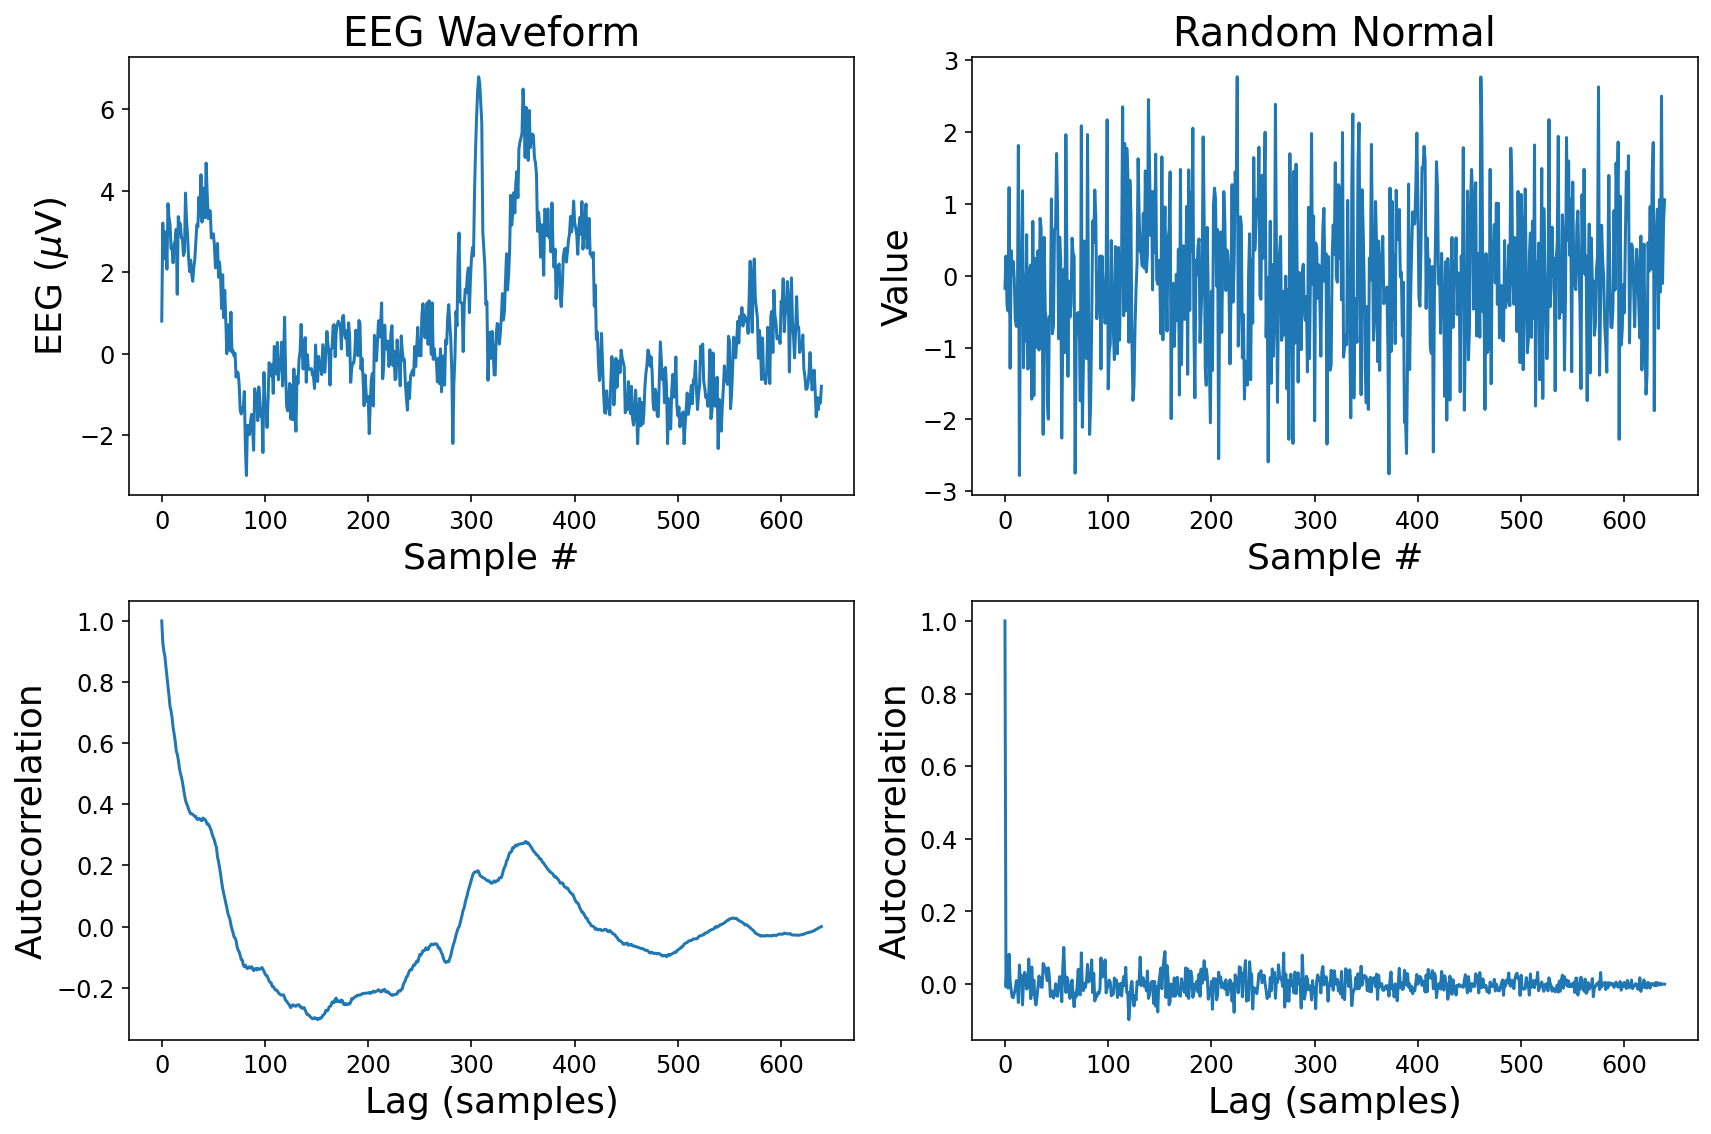

In [64]:
# autocorrlation of EEG waveform and random values
plt.figure(figsize=(12,8))
plt.subplot(2, 2, 1)
plt.plot(EEG)
plt.xlabel('Sample #')
plt.ylabel('EEG ($\mu$V)')
plt.title('EEG Waveform')
plt.subplot(2, 2, 2)
plt.plot(noise)
plt.xlabel('Sample #')
plt.ylabel('Value')
plt.title('Random Normal')
plt.subplot(2, 2, 3)
plt.plot(acf_EEG)
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.subplot(2, 2, 4)
plt.plot(acf_noise)
plt.xlabel('Lag (samples)')
plt.ylabel('Autocorrelation')
plt.tight_layout();

## Sines and Cosines refresher

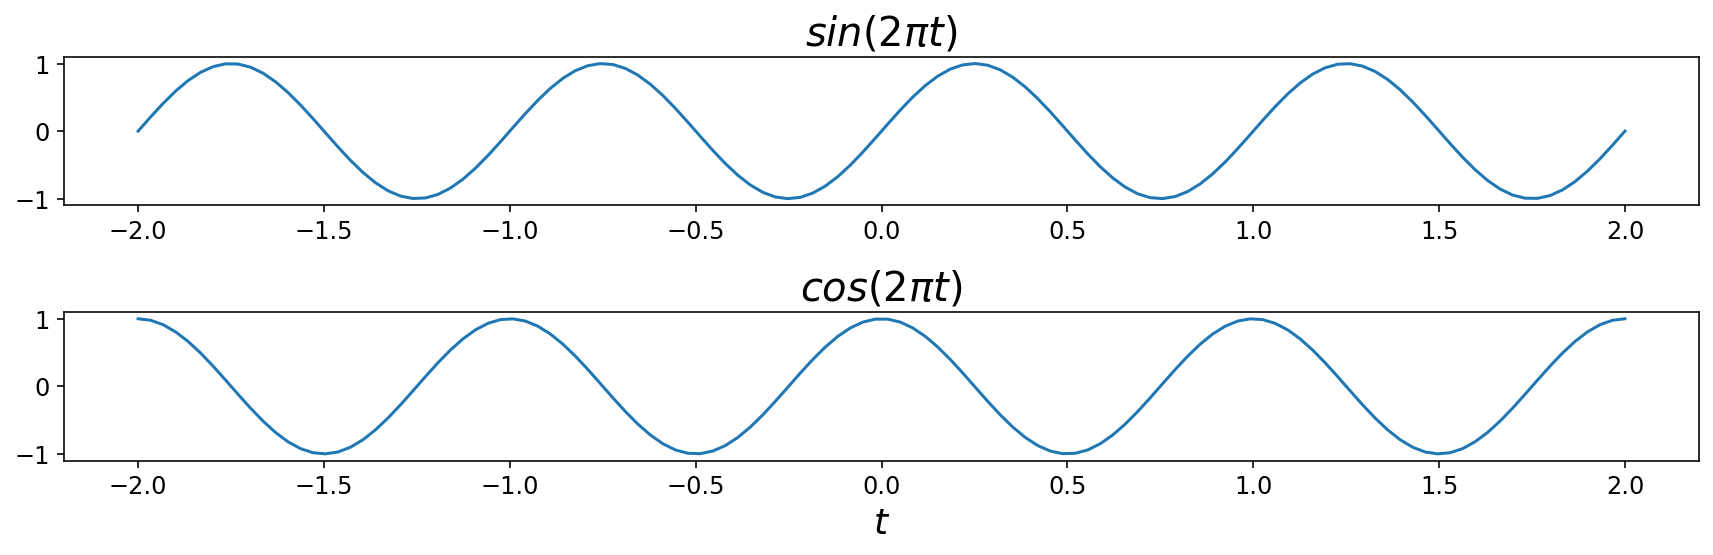

In [65]:
t = np.linspace(-2, 2, 120)
plt.subplot(2,1,1)
plt.plot(t, np.sin(2 * np.pi * t))
plt.title('$sin(2 \pi t)$')
plt.subplot(2,1,2)
plt.plot(t, np.cos(2 * np.pi * t))
plt.xlabel('$t$')
plt.title('$cos(2 \pi t)$')
plt.tight_layout();

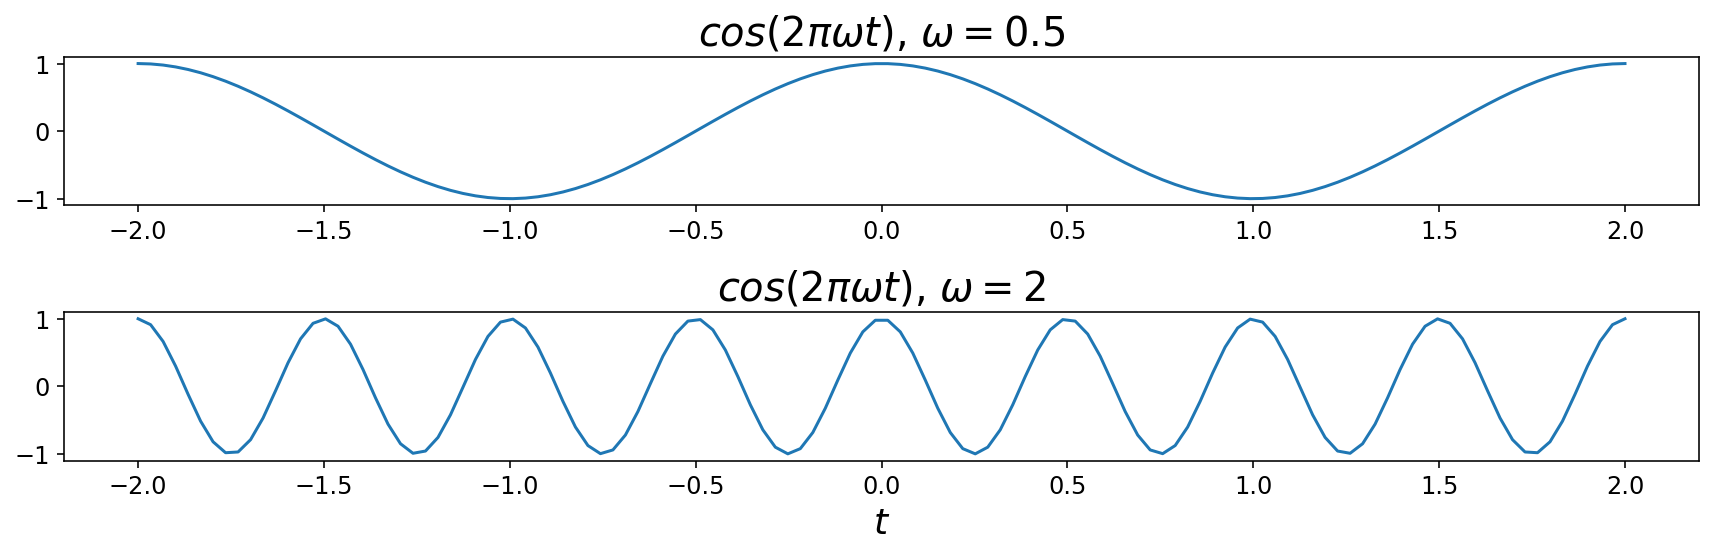

In [66]:
plt.subplot(2,1,1)
plt.plot(t, np.cos(2 * np.pi * 0.5 * t))
plt.title('$cos(2 \pi \omega t)$, $\omega = 0.5$')
plt.subplot(2,1,2)
plt.plot(t, np.cos(2 * np.pi * 2 * t))
plt.xlabel('$t$')
plt.title('$cos(2 \pi \omega t)$, $\omega = 2$')
plt.tight_layout();

## Sampling and Aliasing

In [147]:
# 1000 samples per second
sampleFreq_Hz = 1000

# time between samples is 0.001 sec
dt_sec = 1 / sampleFreq_Hz

# array of time points from 0 to 3 sec at the sample rate
time_sec = np.arange(0, 3 + dt_sec, dt_sec)

# 5 cycles per second --> each cycle takes 0.2 sec
cycleFreq_Hz = 5

# sinusoidal waveform
wave = np.sin(2 * np.pi * cycleFreq_Hz * time_sec)

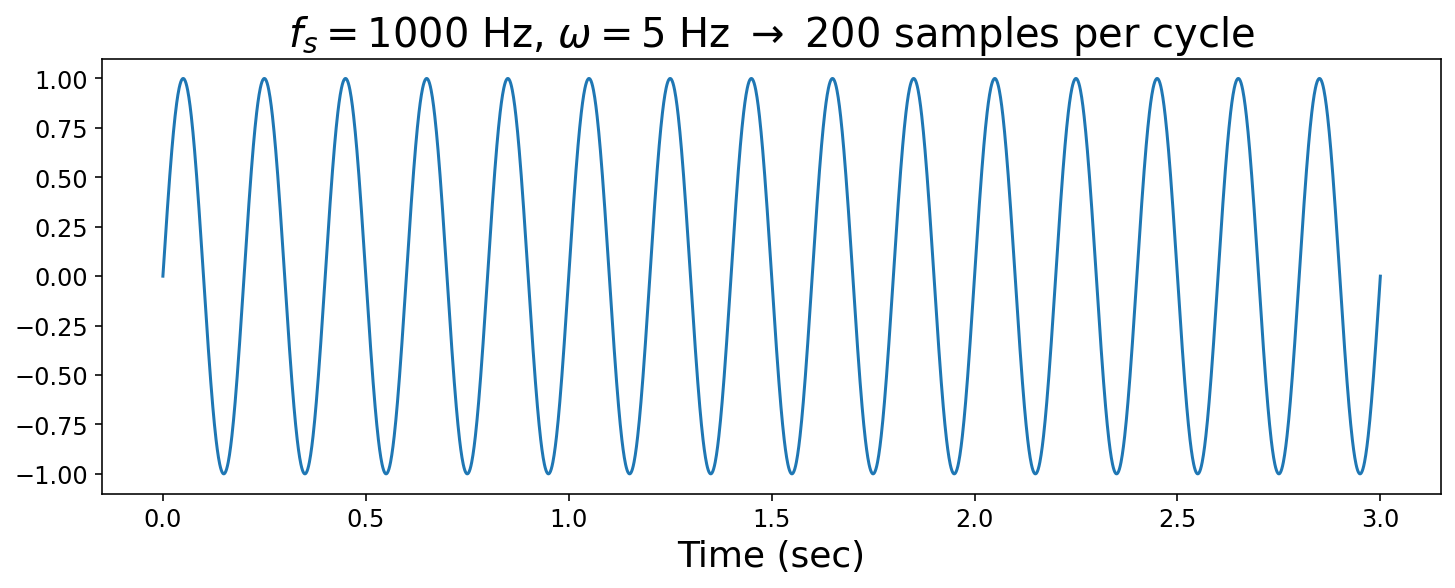

In [68]:
plt.plot(time_sec, wave)
plt.xlabel('Time (sec)')
plt.title(r'$f_s = 1000$ Hz, $\omega = 5$ Hz $\rightarrow$ 200 samples per cycle');

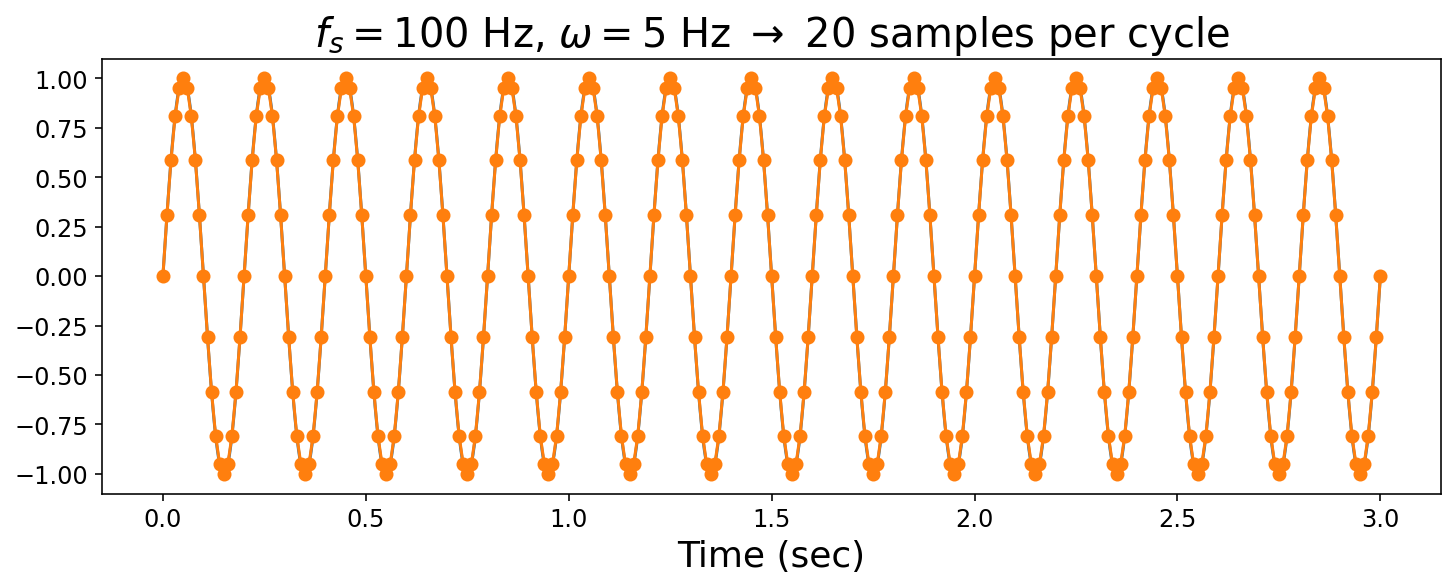

In [69]:
plt.plot(time_sec, wave)
plt.plot(time_sec[::10], wave[::10], 'o-')
plt.xlabel('Time (sec)')
plt.title(r'$f_s = 100$ Hz, $\omega = 5$ Hz $\rightarrow$ 20 samples per cycle');

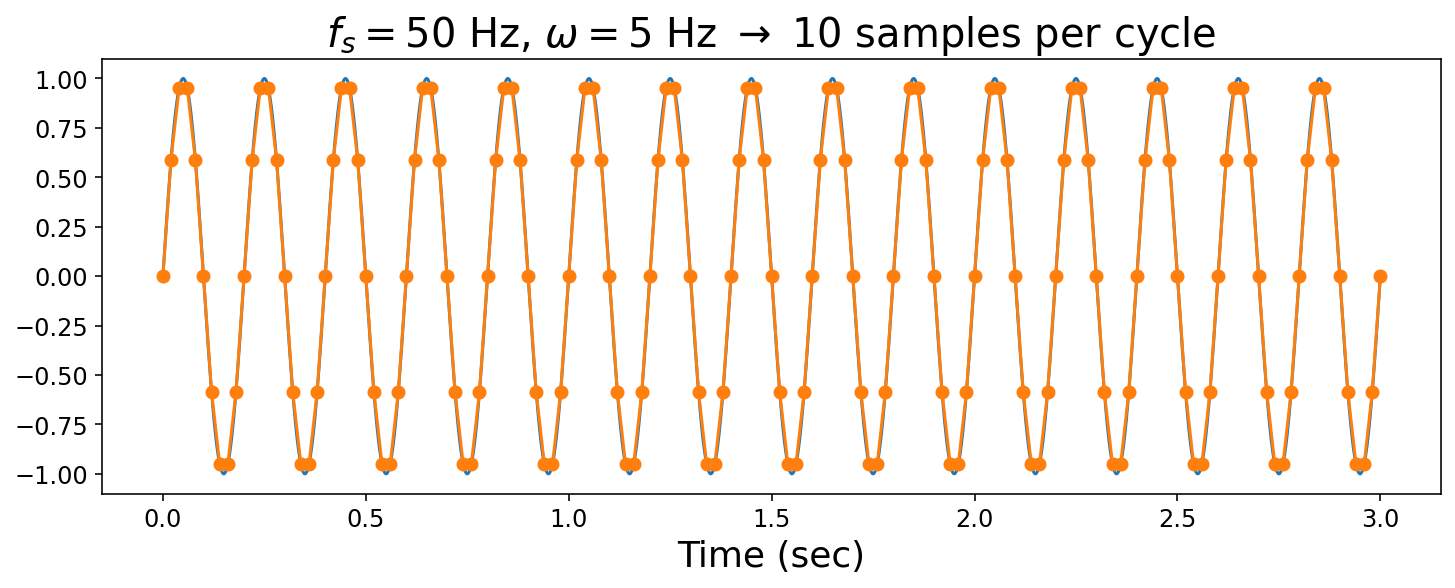

In [70]:
plt.plot(time_sec, wave)
plt.plot(time_sec[::20], wave[::20], 'o-')
plt.xlabel('Time (sec)')
plt.title(r'$f_s = 50$ Hz, $\omega = 5$ Hz $\rightarrow$ 10 samples per cycle');

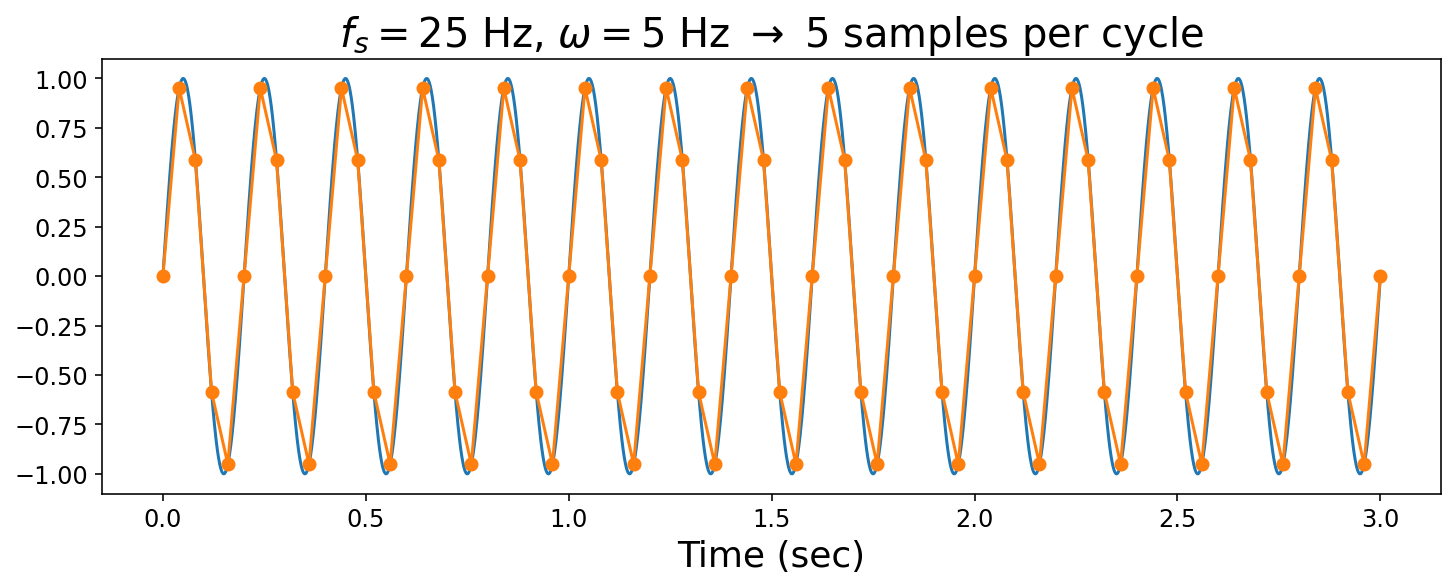

In [71]:
plt.plot(time_sec, wave)
plt.plot(time_sec[::40], wave[::40], 'o-')
plt.xlabel('Time (sec)')
plt.title(r'$f_s = 25$ Hz, $\omega = 5$ Hz $\rightarrow$ 5 samples per cycle');

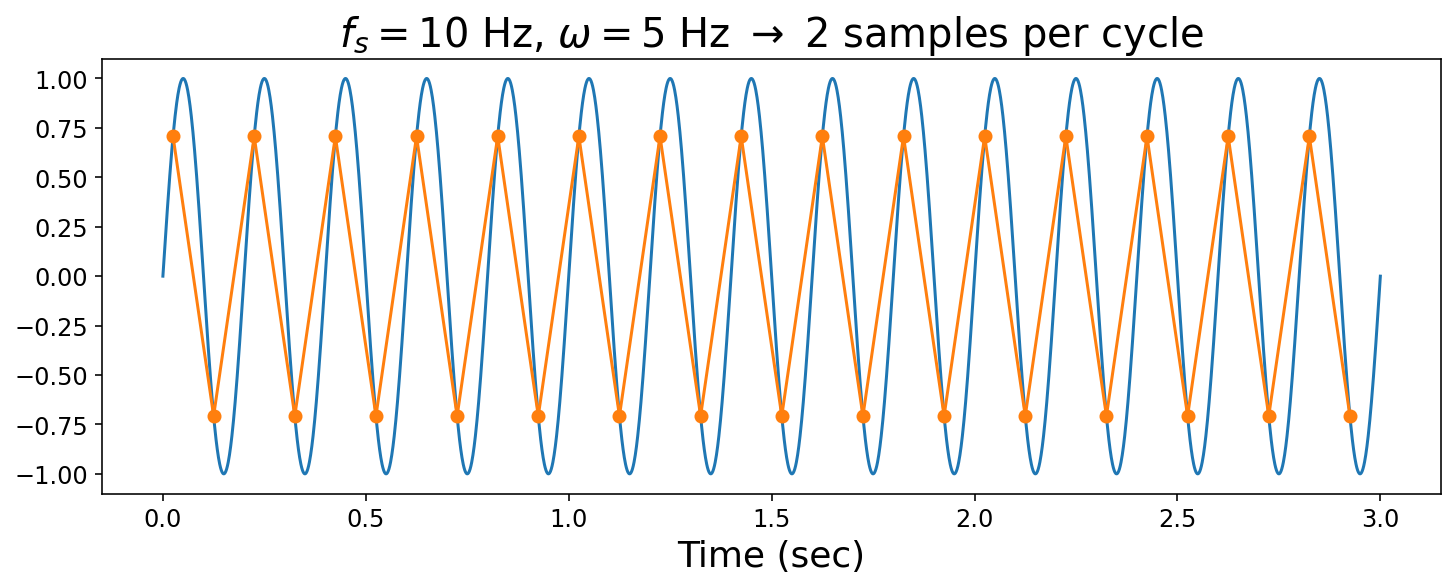

In [72]:
plt.plot(time_sec, wave)
plt.plot(time_sec[25::100], wave[25::100], 'o-')
plt.xlabel('Time (sec)')
plt.title(r'$f_s = 10$ Hz, $\omega = 5$ Hz $\rightarrow$ 2 samples per cycle');

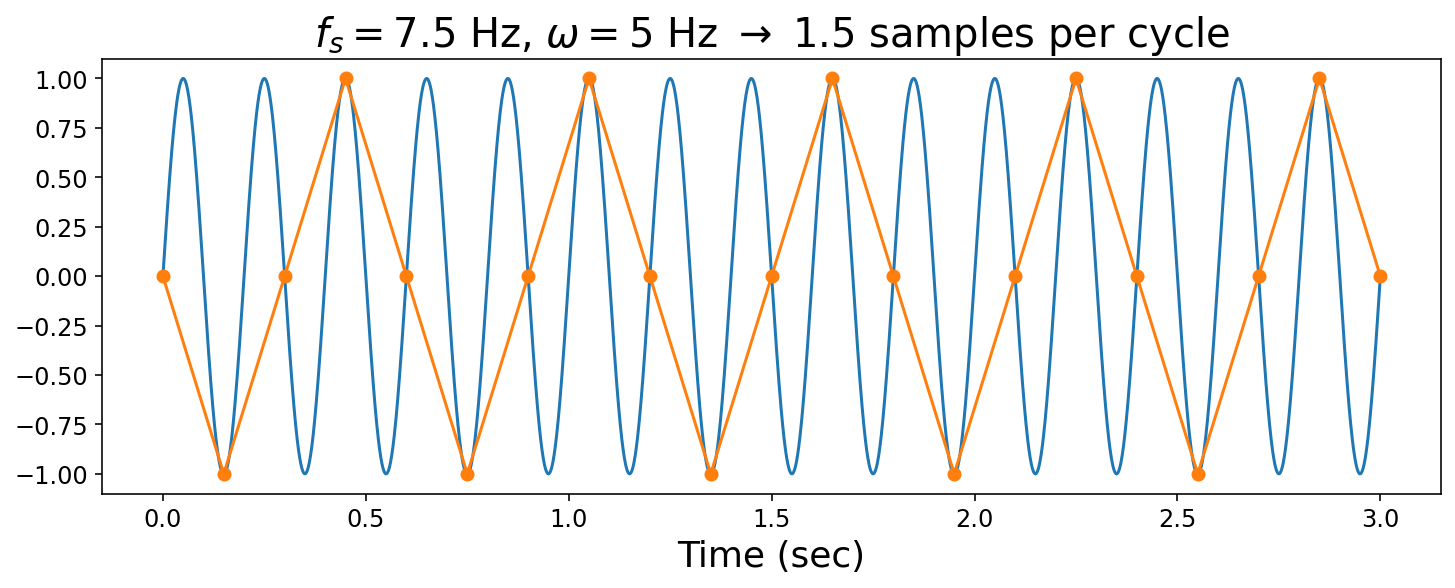

In [73]:
plt.plot(time_sec, wave)
plt.plot(time_sec[::150], wave[::150], 'o-')
plt.xlabel('Time (sec)')
plt.title(r'$f_s = 7.5$ Hz, $\omega = 5$ Hz $\rightarrow$ 1.5 samples per cycle');

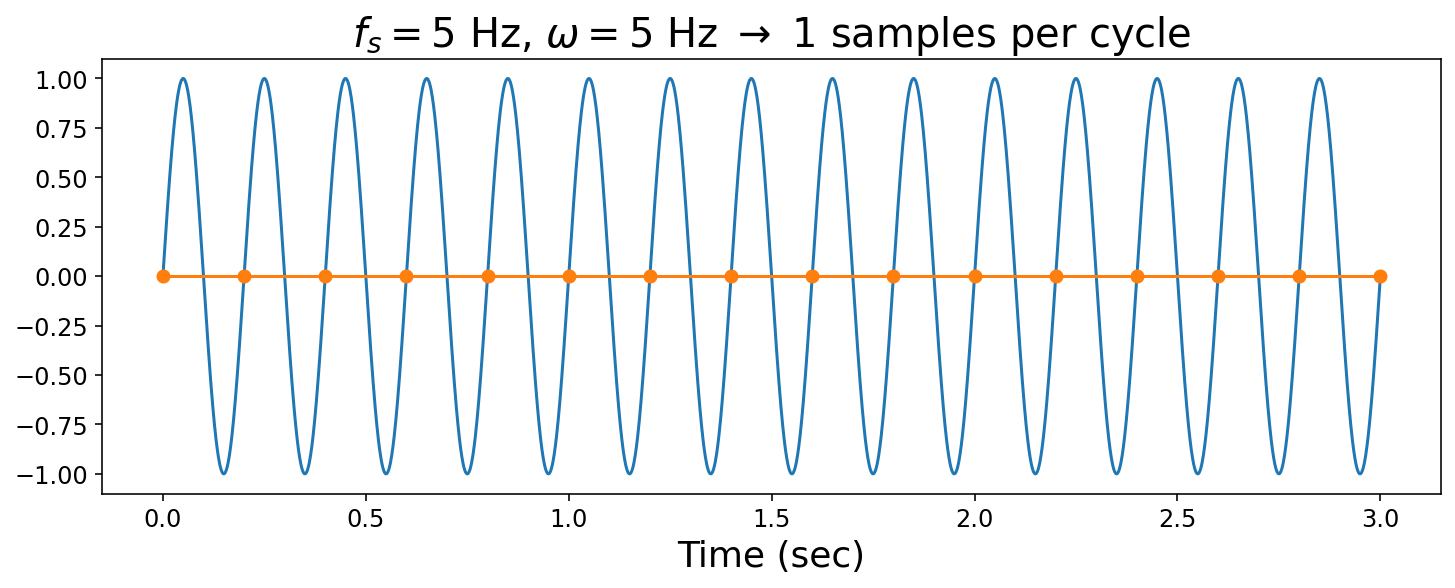

In [74]:
plt.plot(time_sec, wave)
plt.plot(time_sec[::200], wave[::200], 'o-')
plt.xlabel('Time (sec)')
plt.title(r'$f_s = 5$ Hz, $\omega = 5$ Hz $\rightarrow$ 1 samples per cycle');

### Nyquist frequency

Minimum frequency that can be resolved in a signal is one half the sample frequency.

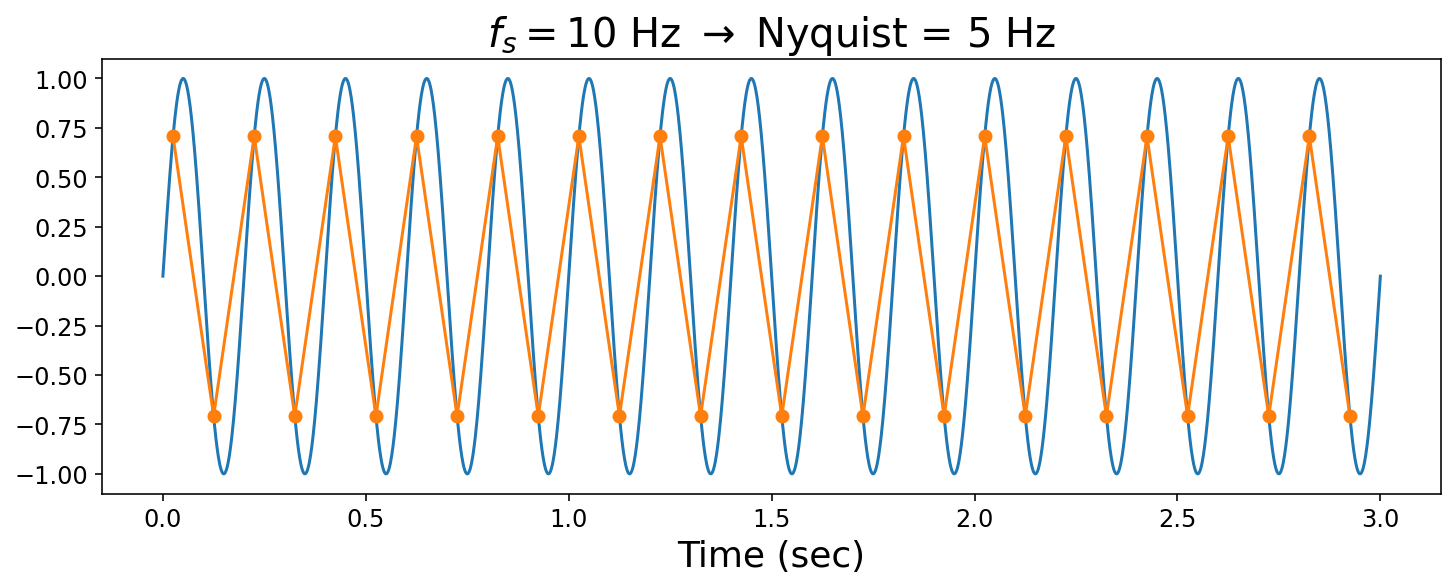

In [75]:
plt.plot(time_sec, wave)
plt.plot(time_sec[25::100], wave[25::100], 'o-')
plt.xlabel('Time (sec)')
plt.title(r'$f_s = 10$ Hz $\rightarrow$ Nyquist = 5 Hz');

### Aliasing

Undersampling results in a low frequency alias artifact.

**!!! This is much worse than just missing the higher frequencies because you get artifactual lower frequencies.**

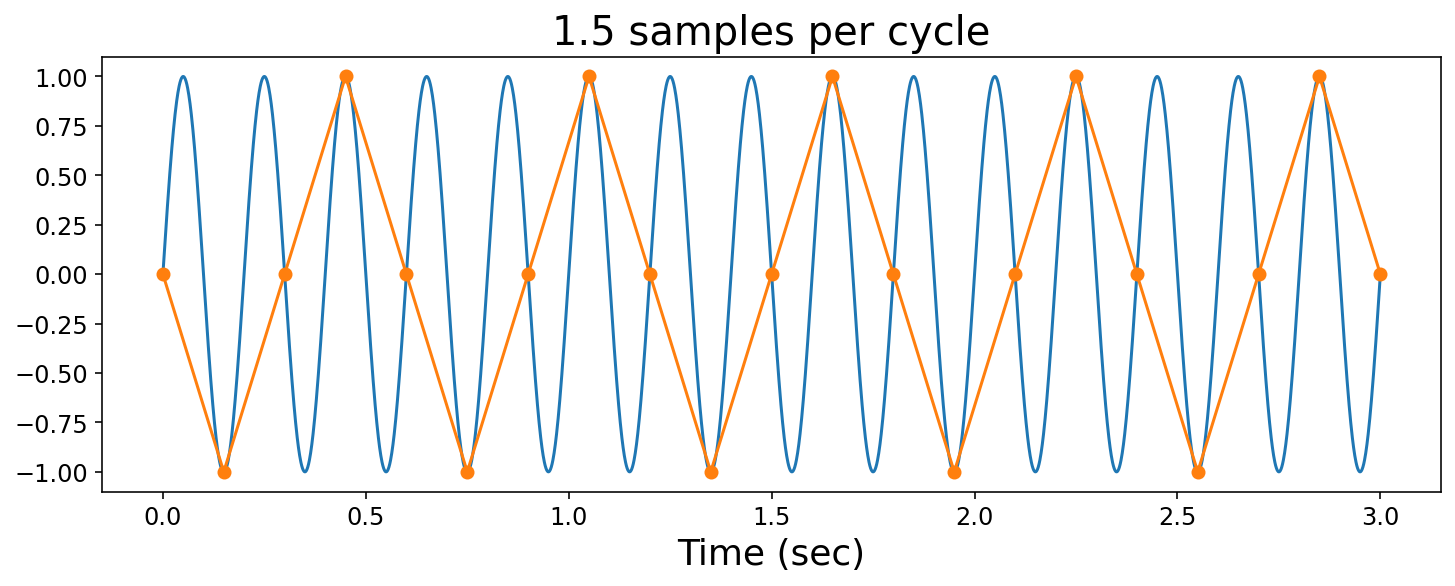

In [76]:
plt.plot(time_sec, wave)
plt.plot(time_sec[::150], wave[::150], 'o-')
plt.xlabel('Time (sec)')
plt.title('1.5 samples per cycle');

# Exercise

You are going to record oscillations in membrane potential from a single neuron. You expect that the neruon will exhibit oscillations at both theta (~10 Hz) and gamma frequencies up to 80 Hz. What is the minimum sample rate necessary to resolve these oscillations?

You need to sample at minimum twice as fast as the fastest oscillation in your data.

Thus, you need to sample at least at 160 Hz.

Consider a waveform with both 10 Hz and 80 Hz oscillations sampled at 1 kHz (1 ms between samples).

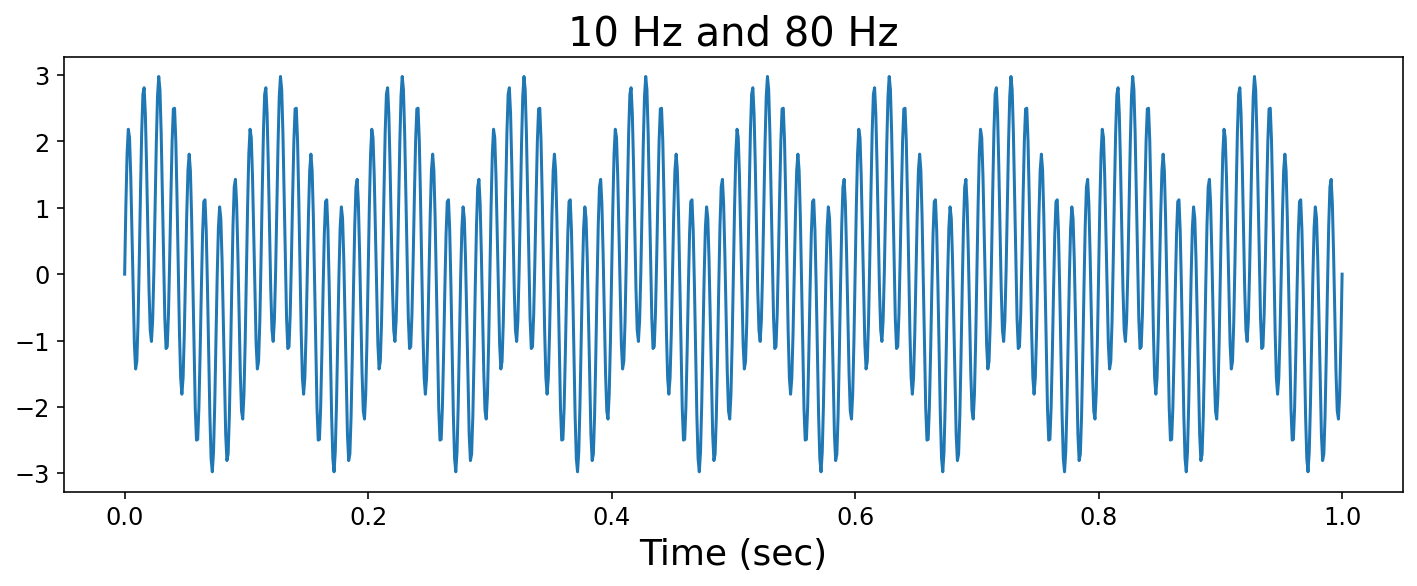

In [149]:
time_sec = np.arange(0, 1.001, 0.001)
data_10Hz = np.sin(2 * np.pi * 10 * time_sec)
data_80Hz = np.sin(2 * np.pi * 80 * time_sec)

data1080 = data_10Hz + 2 * data_80Hz

plt.plot(time_sec, data1080)
plt.xlabel('Time (sec)')
plt.title('10 Hz and 80 Hz');

What would this waveform look like if you only sampled it at 25 Hz?

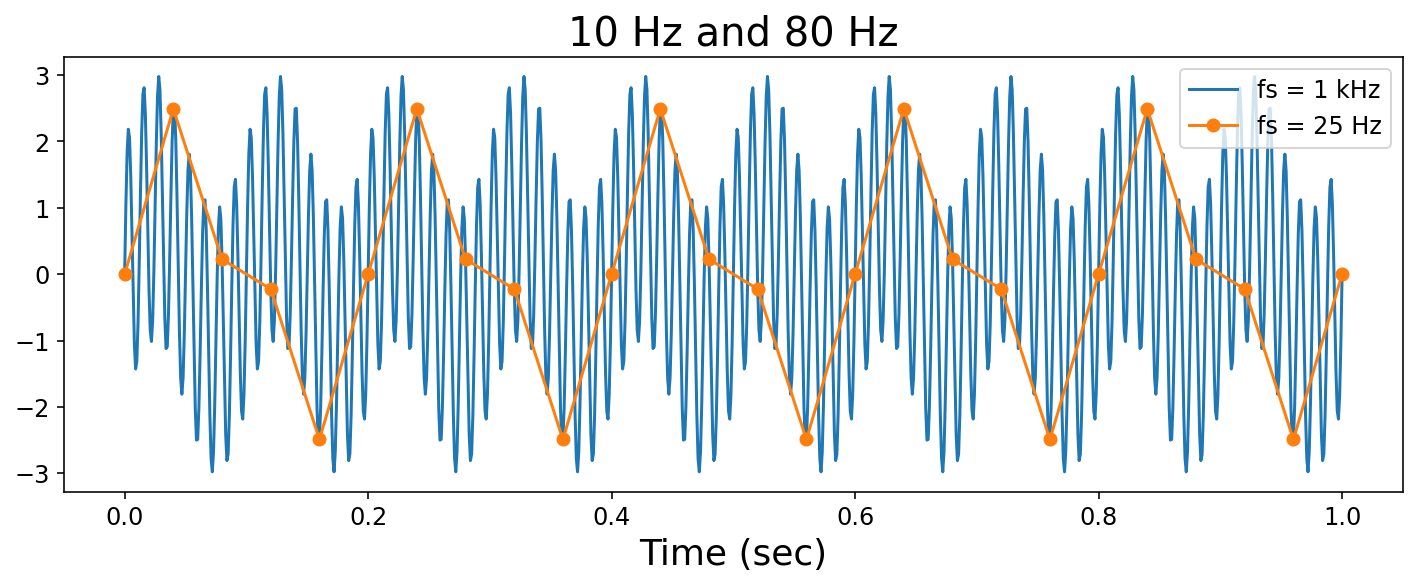

In [78]:
plt.plot(time_sec, data1080, label='fs = 1 kHz')
plt.plot(time_sec[::40], data1080[::40], 'o-', label='fs = 25 Hz');
plt.xlabel('Time (sec)')
plt.title('10 Hz and 80 Hz')
plt.legend();

# Fourier Transform

* Describe any waveform as the summation of simple sinusoidal signals at various frequencies.
* The Fourier transform of a waveform tells us how much of each frequency component is in the waveform.
* It converts a time domain waveform to a frequency domain signal.
* It is invertable, so we can also convert back from frequency to time domains.
* The concept is also valid for space and spatial frequencies.

![FFT](images/fourier_comps.png)

Any waveform, even a square pulse, can be built out of sinusoidal signals of varying amplitude and frequency.

![FFT](images/fourier_rect_comps.png)

Let's consider our waveform with both 10 Hz and 80 Hz oscillations.

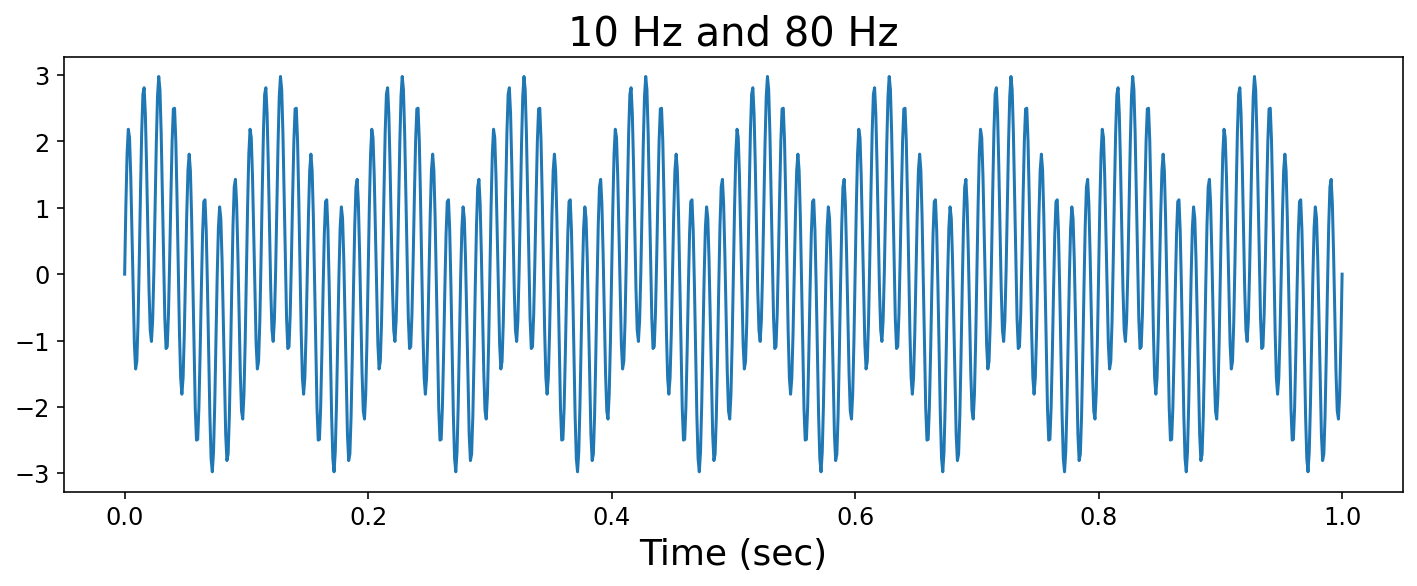

In [150]:
plt.plot(time_sec, data1080)
plt.xlabel('Time (sec)')
plt.title('10 Hz and 80 Hz');

In [151]:
sampleInterval_sec = time_sec[1] - time_sec[0]

sampleFreq_Hz = 1 / sampleInterval_sec

# Fastest frequency that we can resolve at the above sample rate
nyquistFreq_Hz = sampleFreq_Hz / 2

sampleFreq_Hz, nyquistFreq_Hz

(1000.0, 500.0)

Use a Fast Fourier Transform (FFT) to see how much of which frequencies are in the waveform.

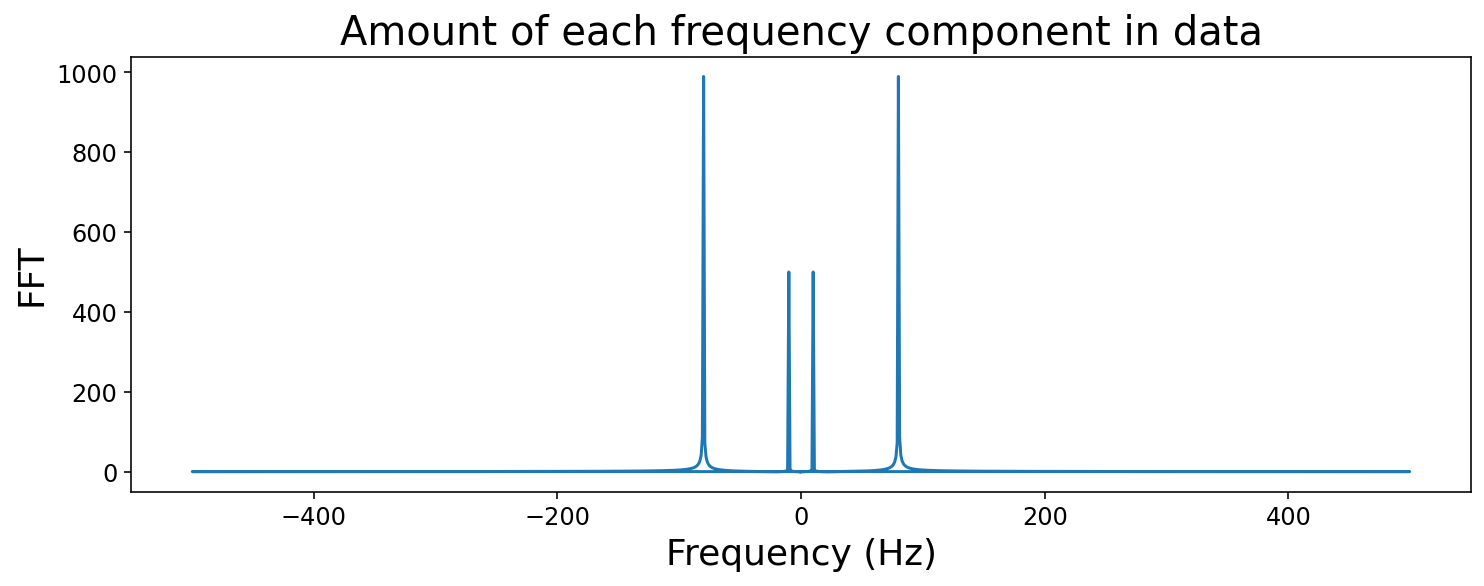

In [107]:
# amount of each frequency component in the time series
fft = np.fft.fft(data1080)

# the frequencies corresponding to the amounts in fft above
# !!! pay attention to units!
freq_Hz = np.fft.fftfreq(len(fft), sampleInterval_sec)

plt.plot(freq_Hz, np.abs(fft))
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT')
plt.title('Amount of each frequency component in data');

Note that the frequency range goes up to the Nyquist frequency, but not beyond.

For real inputs, positive and negative frequency components are symmetrical.

So typically you just look at positive frequencies up to the Nyquist frequency.

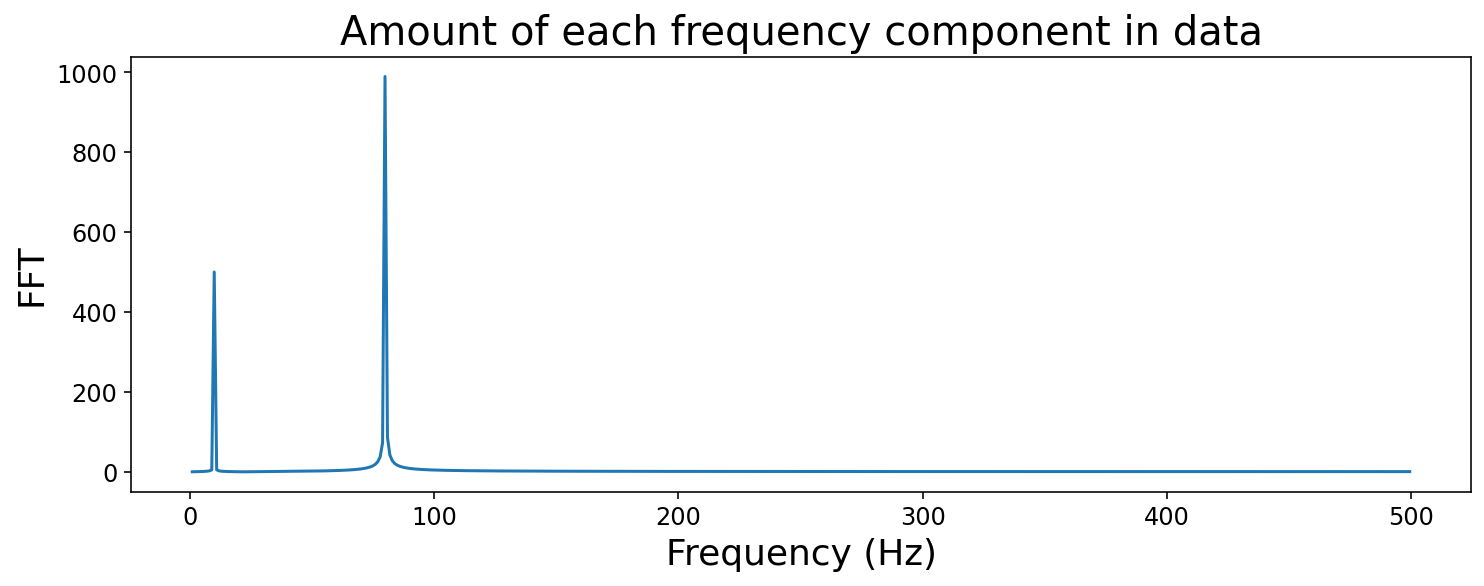

In [108]:
pos = (freq_Hz > 0)

plt.plot(freq_Hz[pos], np.abs(fft[pos]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT')
plt.title('Amount of each frequency component in data');

Inverse FFT returns to original time series.

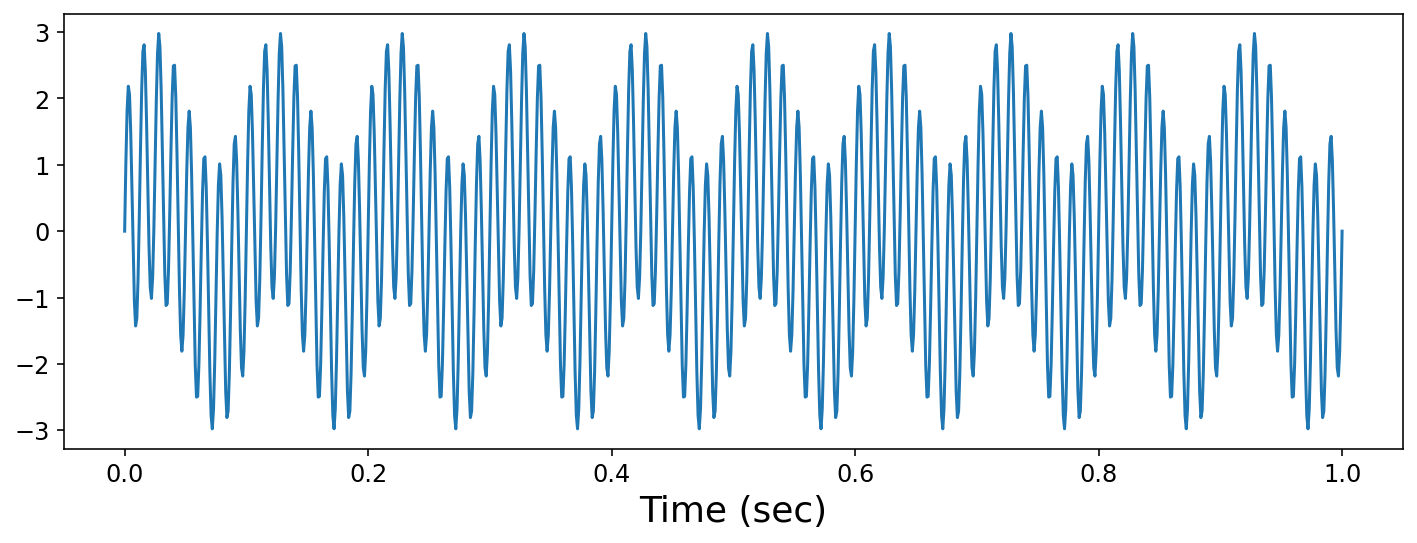

In [109]:
data1080inv = np.real(np.fft.ifft(fft))

plt.plot(time_sec, data1080inv)
plt.xlabel('Time (sec)');

Because it is invertible, FFT is useful for manipulating the frequency components in a signal.

Let's remove the 80 Hz component.

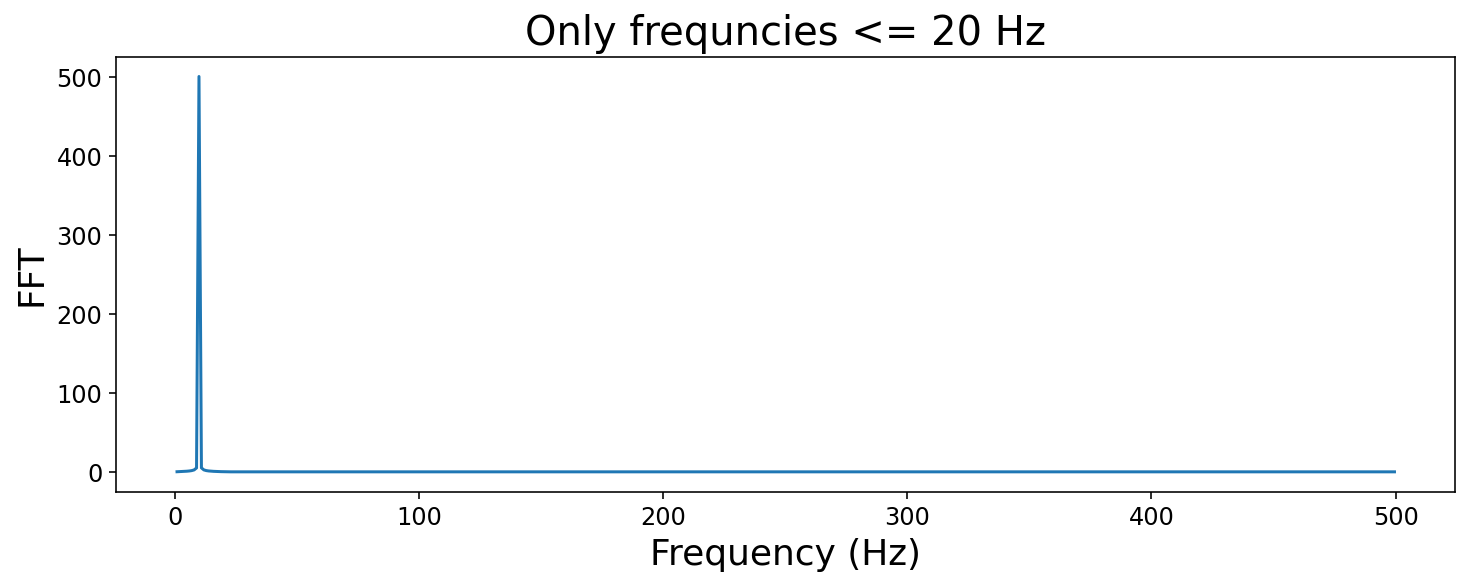

In [110]:
# so we don't do anything to our original fft
fft10only = fft.copy()

# remove all frequencies above 20 Hz (i.e. the 80 Hz component)
high = (np.abs(freq_Hz) > 20)
fft10only[high] = 0

plt.plot(freq_Hz[pos], np.abs(fft10only[pos]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT')
plt.title('Only frequncies <= 20 Hz');

Use inverse FFT to get the time series with only freqeuncies below 20 Hz.

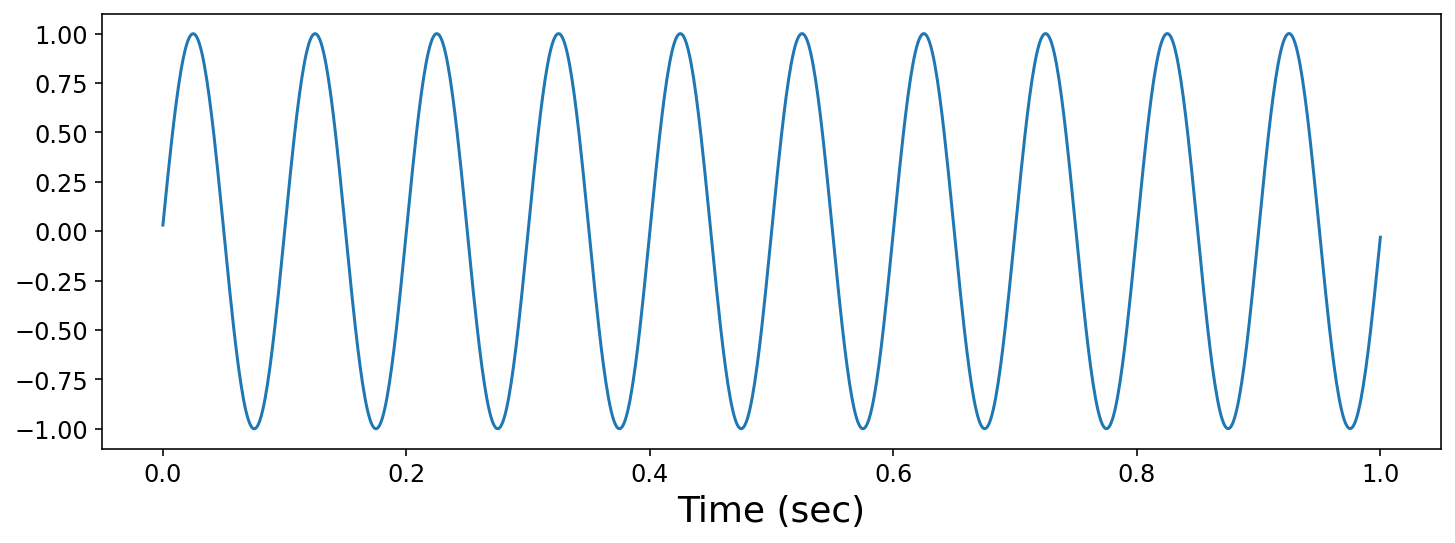

In [111]:
data10only = np.real(np.fft.ifft(fft10only))

plt.plot(time_sec, data10only)
plt.xlabel('Time (sec)');

Let's examine the frequency components of our 25 Hz downsampled data.

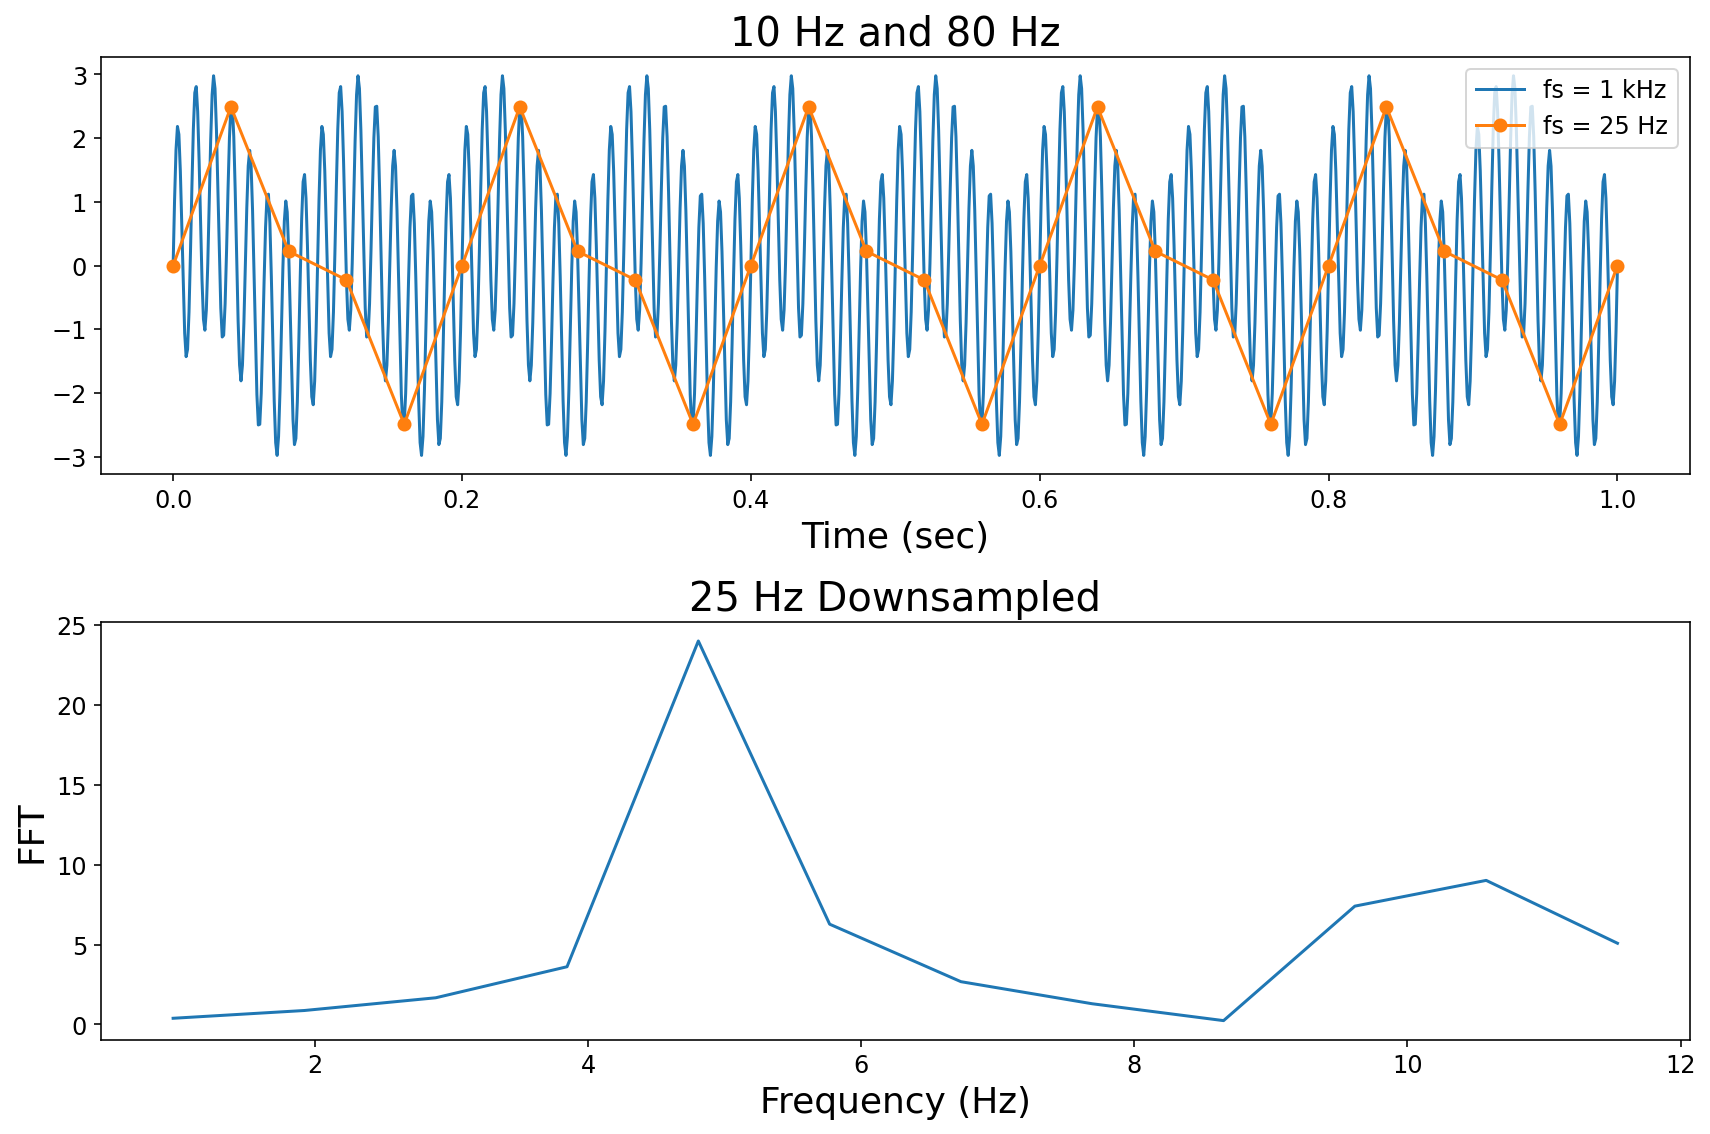

In [112]:
# FFT of undersampled data
plt.figure(figsize=(12,8))
plt.subplot(2, 1, 1)
plt.plot(time_sec, data1080, label='fs = 1 kHz')
plt.plot(time_sec[::40], data1080[::40], 'o-', label='fs = 25 Hz');
plt.xlabel('Time (sec)')
plt.title('10 Hz and 80 Hz')
plt.legend()
plt.subplot(2, 1, 2)
fft = np.fft.fft(data1080[::40])
freq_Hz = np.fft.fftfreq(len(fft), 1/25)
pos = (freq_Hz > 0)
plt.plot(freq_Hz[pos], np.abs(fft[pos]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT')
plt.title('25 Hz Downsampled');
plt.tight_layout();

# Exercise

Compute the FFT of the EEG time series and plot the frequency components.

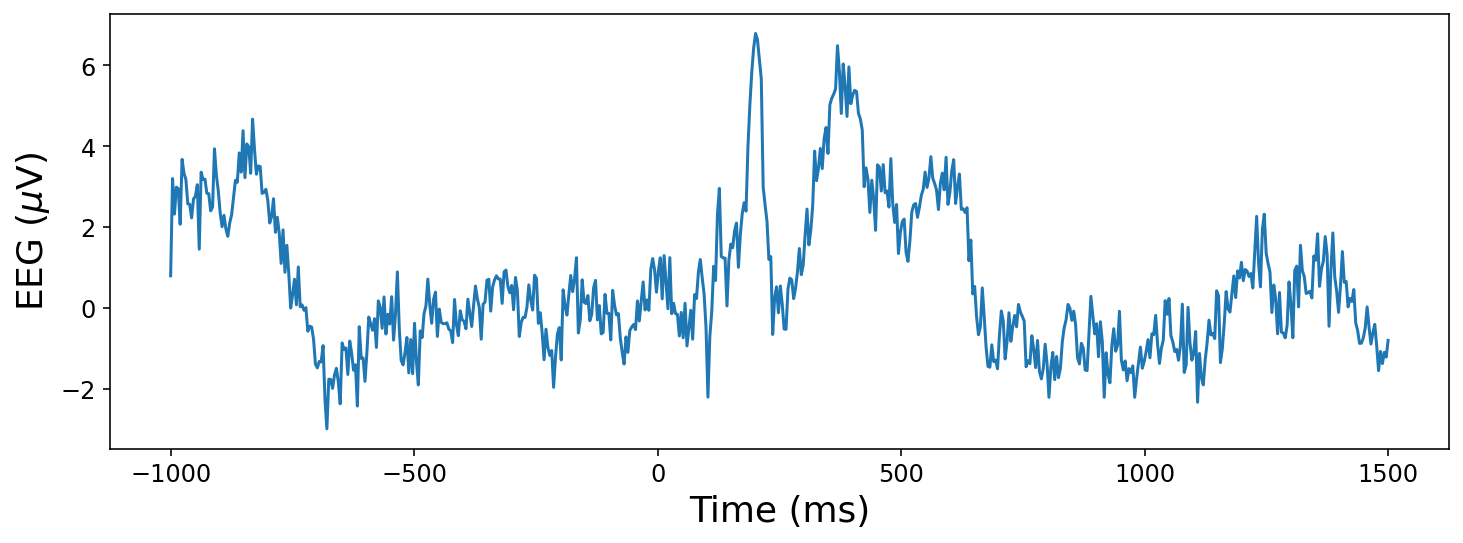

In [124]:
time_ms = np.linspace(-1000, 1500, len(EEG))

plt.plot(time_ms, EEG)
plt.xlabel('Time (ms)')
plt.ylabel('EEG ($\mu$V)');

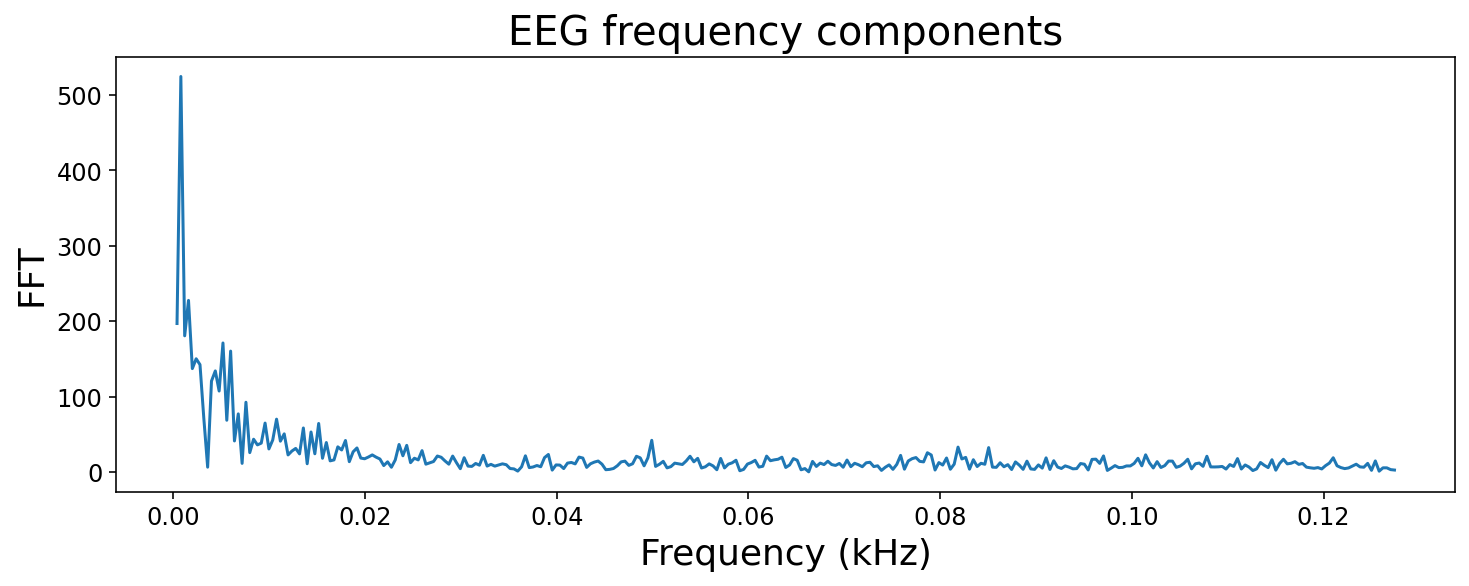

In [129]:
dt_ms = time_ms[2] - time_ms[1]

fft = np.fft.fft(EEG)
freq_kHz = np.fft.fftfreq(len(fft), dt_ms)

pos = (freq_kHz > 0)

plt.plot(freq_kHz[pos], np.abs(fft[pos]))
plt.xlabel('Frequency (kHz)')
plt.ylabel('FFT')
plt.title('EEG frequency components');

### Power Spectrum

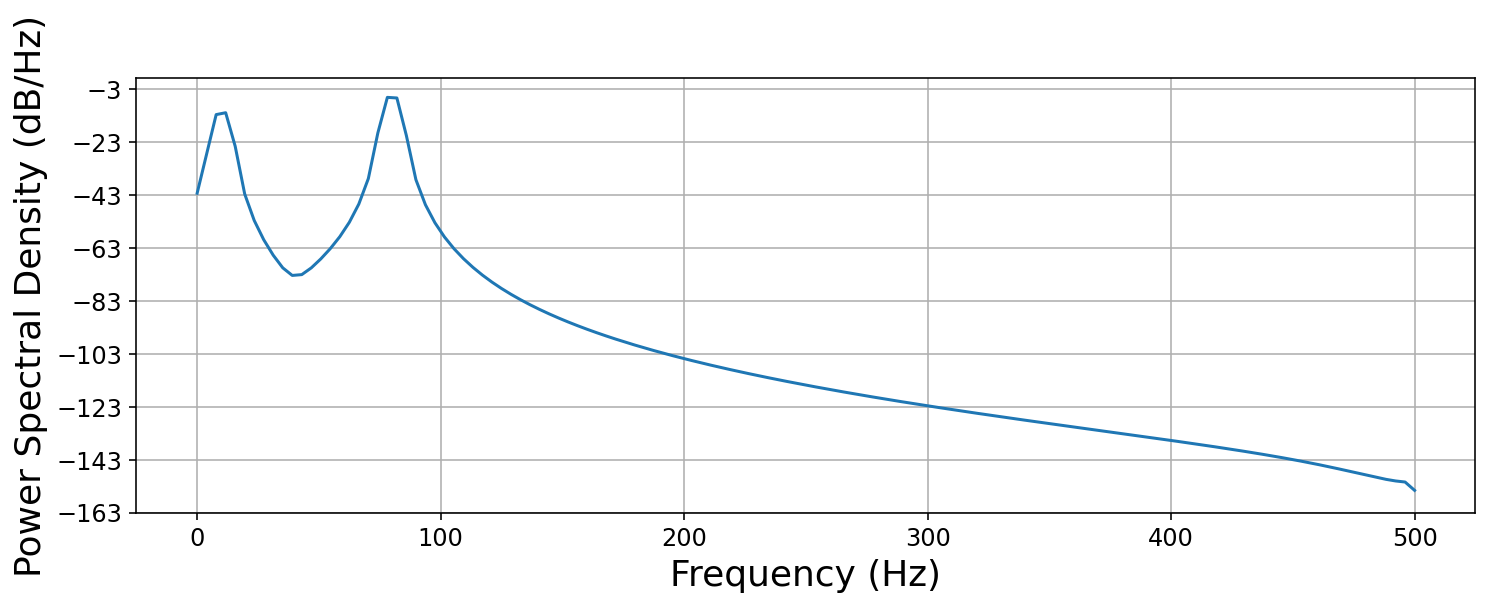

In [152]:
sampleFreq_Hz = 1000

plt.psd(data1080, Fs=sampleFreq_Hz);
plt.xlabel('Frequency (Hz)');

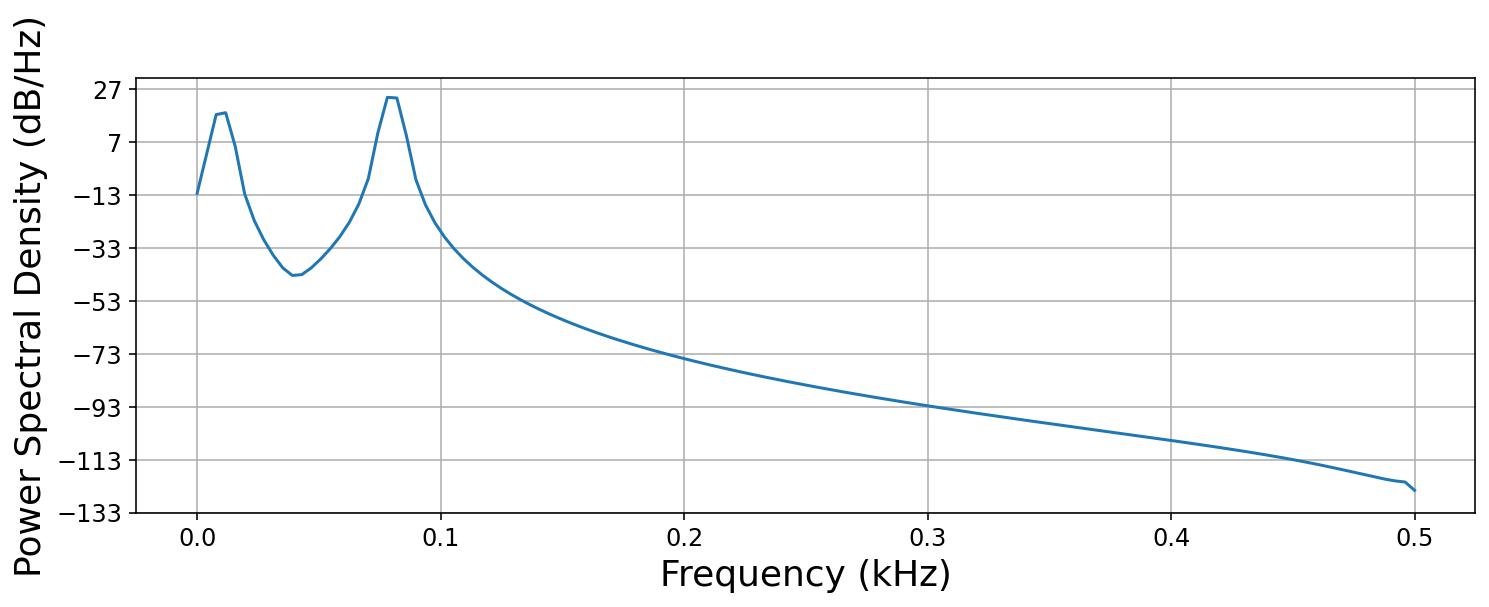

In [117]:
sampleFreq_kHz = 1

plt.psd(data1080, Fs=sampleFreq_kHz)
plt.xlabel('Frequency (kHz)');

Power spectrum for the 10 Hz and 80 Hz waveform undersampled at 25 Hz.

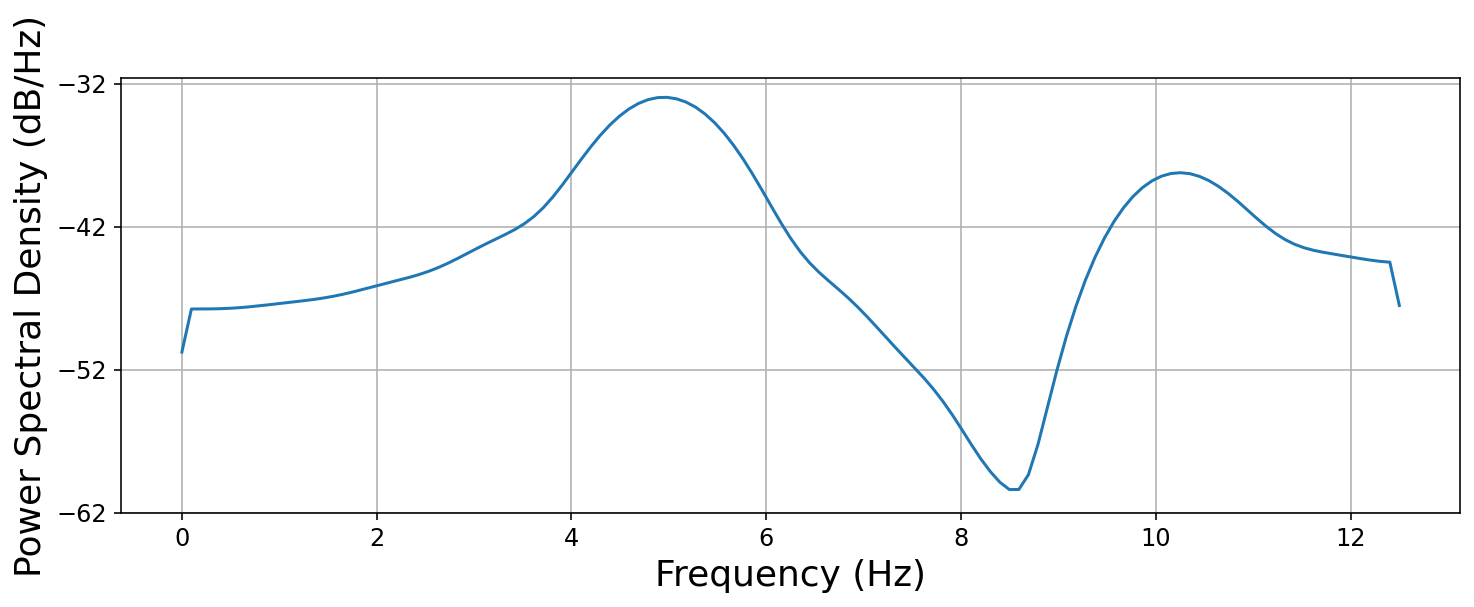

In [118]:
plt.psd(data1080[::40], Fs=25)
plt.xlabel('Frequency (Hz)');

Power spectrum of EEG waveform.

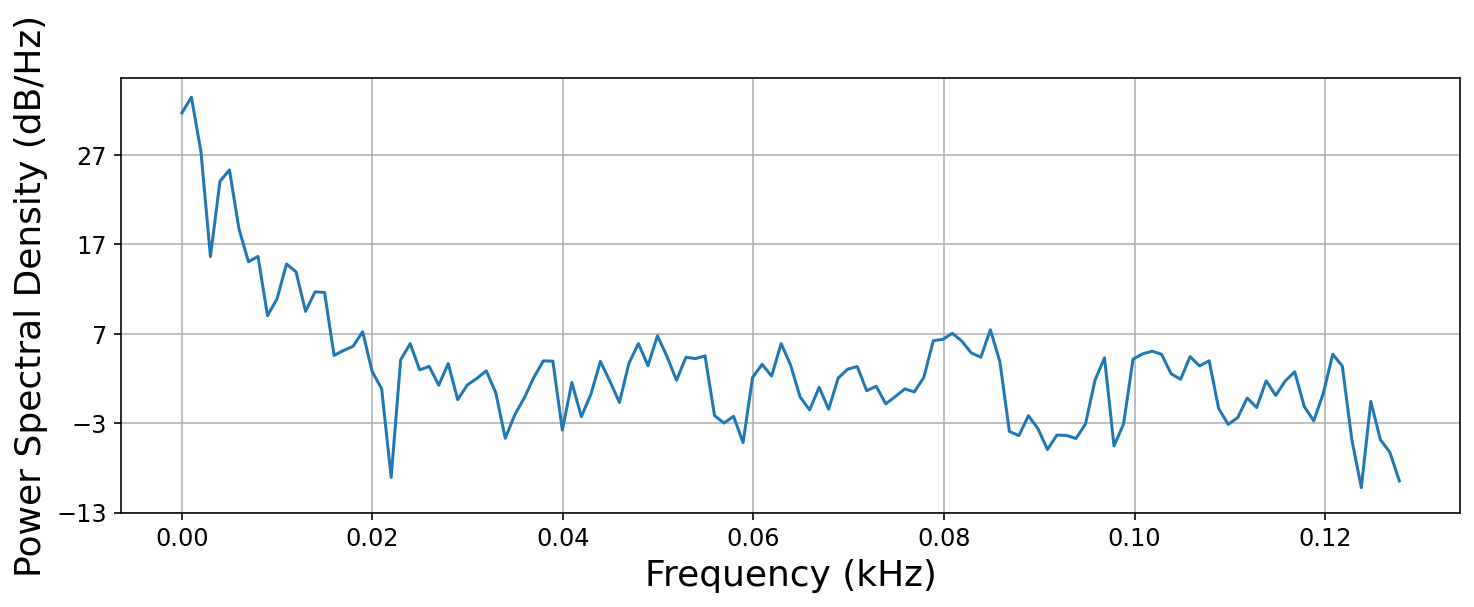

In [130]:
sampleFreq_kHz = 1 / dt_ms
plt.psd(EEG, Fs=sampleFreq_kHz)
plt.xlabel('Frequency (kHz)');

### Spectrogram

![Spectrogram](images/spectrogram.png)

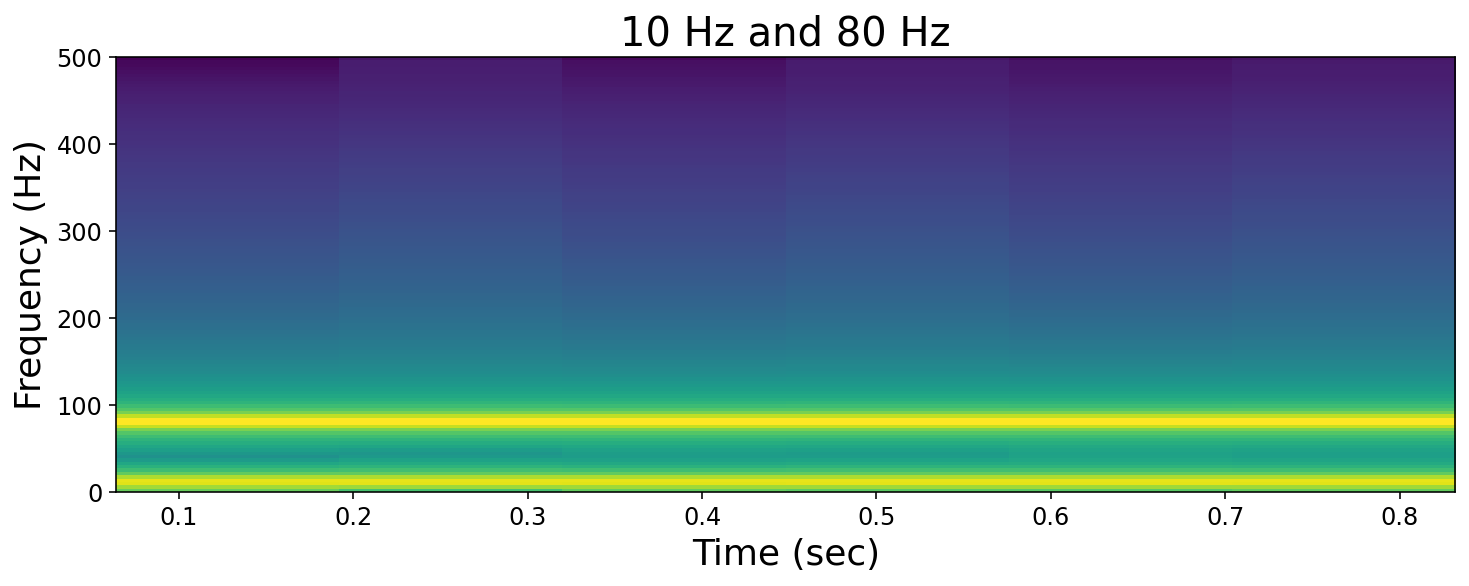

In [137]:
sampleFreq_Hz = 1000
plt.specgram(data1080, Fs=sampleFreq_Hz);
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (Hz)')
plt.title('10 Hz and 80 Hz');

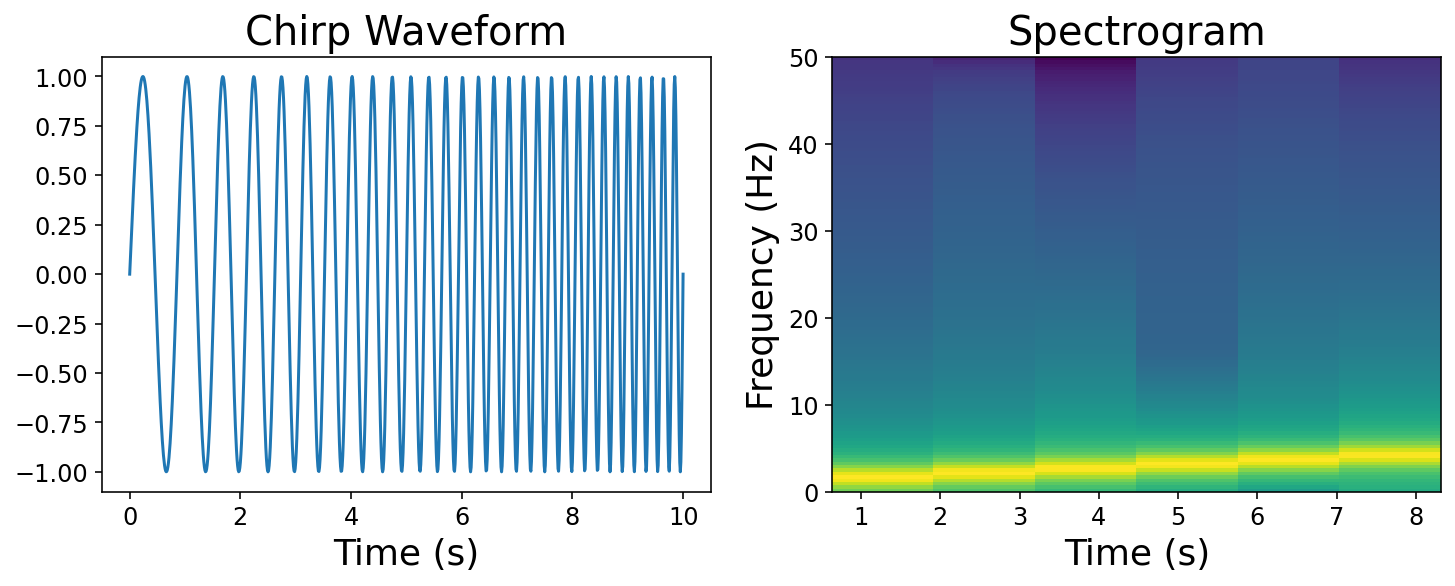

In [122]:
# chirp waveform and spectrogram
time_sec = np.linspace(0, 10, 1001)
chirp = np.sin(2 * np.pi * 1 * time_sec * (1 + 0.2 * time_sec))
chirpSampleFreq_Hz = 1 / (time_sec[1] - time_sec[0])

plt.subplot(1,2,1)
plt.plot(time_sec, chirp)
plt.xlabel('Time (s)')
plt.title('Chirp Waveform')

plt.subplot(1,2,2)
plt.specgram(chirp, Fs=chirpSampleFreq_Hz)
plt.xlabel("Time (s)")
plt.ylabel("Frequency (Hz)")
plt.title('Spectrogram');

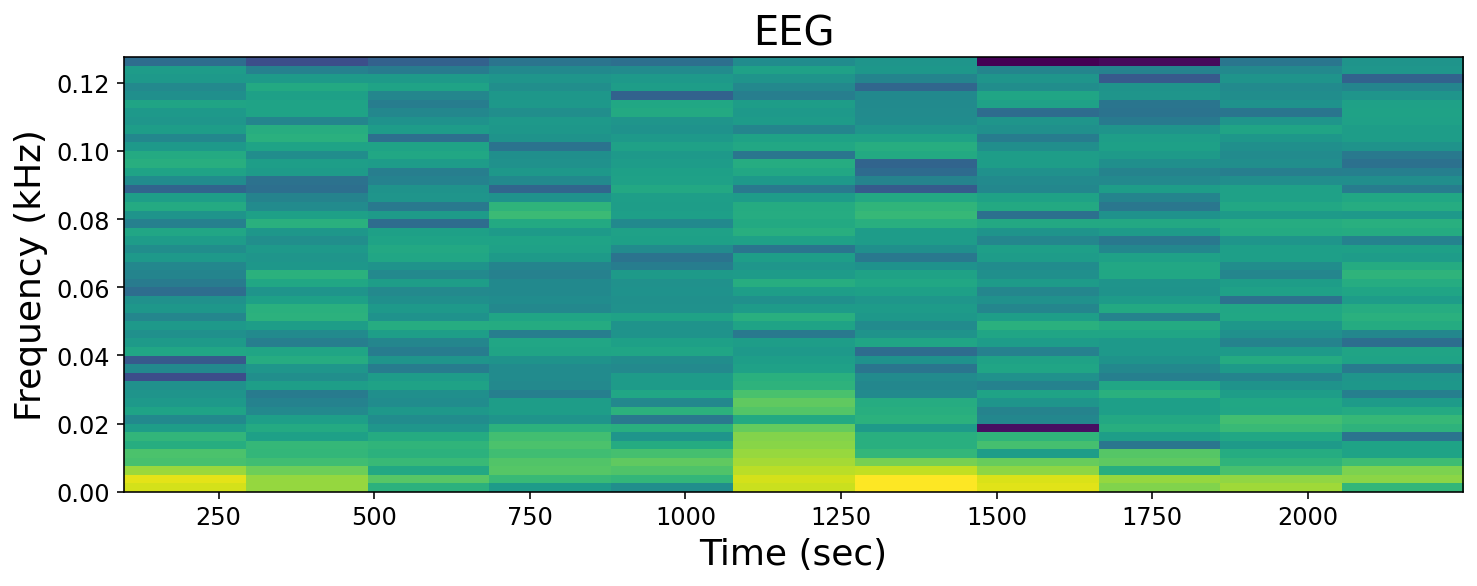

In [139]:
sampleFreq_kHz = 1 / dt_ms
plt.specgram(EEG, Fs=sampleFreq_kHz, NFFT=100, noverlap=50);
plt.xlabel('Time (sec)')
plt.ylabel('Frequency (kHz)')
plt.title('EEG');